# STAT 682 Mini Project 1

- WRDS (https://wrds-www.wharton.upenn.edu/Links to an external site.)
- FRED (https://fred.stlouisfed.org/Links to an external site.)
- The Conference Board (https://www.conference-board.org/Links to an external site.)
  - You can find the dates of recessions here

### Load the data

#### Data Resources Overview

We gathered key economic indicators using the **fredapi** package, which fetches data from the Federal Reserve Economic Data (FRED) repository. The dataset includes several economic indicators that are important in analyzing macroeconomic trends and forecasting potential market conditions.

---

##### 1. **Federal Funds Effective Rate**
   - **Source**: FRED (Federal Reserve Economic Data)
   - **Variable**: `Federal Fund Effective Rate`
   - **Frequency**: Monthly
   - **Coverage**: 1954 - Present
   - **Explanation**: The Federal Funds Rate is the interest rate at which depository institutions lend reserve balances to other depository institutions overnight. This is a crucial monetary policy tool used to influence economic conditions.

##### 2. **Inflation Rate**
   - **Source**: FRED (CORESTICKM159SFRBATL series)
   - **Variable**: `Inflation Rate`
   - **Frequency**: Monthly
   - **Coverage**: 1968 - Present
   - **Explanation**: This series reflects core inflation, which excludes volatile food and energy prices, providing a stable measure of inflationary pressures in the economy.

##### 3. **GDP (Gross Domestic Product)**
   - **Source**: FRED (GDP series)
   - **Variable**: `GDP`
   - **Frequency**: Quarterly
   - **Coverage**: 1947 - Present
   - **Explanation**: GDP measures the total value of goods and services produced in a country, serving as a comprehensive indicator of economic activity and growth.

##### 4. **Unemployment Rate**
   - **Source**: FRED (UNRATE series)
   - **Variable**: `Unemployment Rate`
   - **Frequency**: Monthly
   - **Coverage**: 1948 - Present
   - **Explanation**: The unemployment rate measures the percentage of the total labor force that is unemployed but actively seeking employment. It serves as a critical indicator of economic health.

##### 5. **Consumer Sentiment**
   - **Source**: FRED (UMCSENT series)
   - **Variable**: `Consumer Sentiment`
   - **Frequency**: Monthly
   - **Coverage**: 1952 - Present (But Relevant from Jan 1978)
   - **Explanation**: This index reflects the level of confidence consumers have in the economy, based on surveys about their personal financial situation and expectations for the economy's future.

##### 6. **Composite Leading Indicator (CLI)**
   - **Source**: FRED (USALOLITONOSTSAM series)
   - **Variable**: `Composite Leading Indicator`
   - **Frequency**: Monthly
   - **Coverage**: 1955 - Present
   - **Explanation**: The CLI is designed to anticipate turning points in economic activity relative to its long-term trend. It helps predict future economic activity by aggregating several indicators.

##### 7. **Yield Curve (10-Year Treasury minus 3-Month Treasury)**
   - **Source**: FRED (T10Y3MM series)
   - **Variable**: `Yield Curve: 10Y - 3M`
   - **Frequency**: Daily
   - **Coverage**: 1982 - Present
   - **Explanation**: This indicator reflects the difference between the 10-year Treasury bond yield and the 3-month Treasury yield. Inversions of this yield curve often precede recessions.

##### 8. **Brave-Butters-Kelley Coincident Index**
   - **Source**: FRED (BBKMCOIX series)
   - **Variable**: `Coincident Indicators`
   - **Frequency**: Monthly
   - **Coverage**: 1960 - Present
   - **Explanation**: This index reflects current economic conditions by aggregating a number of key coincident indicators, including employment and income data.

##### 9. **Composite Index of Three Lagging Indicators**
   - **Source**: FRED (M16005USM358SNBR series)
   - **Variable**: `Lagging Indicators`
   - **Frequency**: Monthly
   - **Coverage**: 1960 - Present
   - **Explanation**: This index aggregates several economic indicators that tend to lag the business cycle, such as unemployment and business inventories, providing a picture of past economic performance.

##### 10. **Recession Indicator**
   - **Source**: FRED (USREC series)
   - **Variable**: `Recession Indicators`
   - **Frequency**: Monthly
   - **Coverage**: 1854 - Present
   - **Explanation**: The recession indicator signals whether the economy is in a recession (1.0) or not (0.0), based on official classifications from the National Bureau of Economic Research (NBER).

---

In [1]:
! pip install fredapi

In [2]:
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
fred = Fred(api_key='e6ffaec586eee5e9a907f15c1d38688e')

In [3]:
# Federal Funds
federal_fund_effective_rate = fred.get_series('FEDFUNDS')
federal_fund_effective_rate_df = pd.DataFrame(federal_fund_effective_rate, columns=['Federal Fund Effective Rate'])

# Inflation
inflation_rate = fred.get_series('CORESTICKM159SFRBATL')
inflation_rate_df = pd.DataFrame(inflation_rate, columns=['Inflation Rate'])

# GDP
gdp = fred.get_series('GDP')
gdp_df = pd.DataFrame(gdp, columns=['GDP'])

# Unemployment
unemployment_rate = fred.get_series('UNRATE')
unemployment_df = pd.DataFrame(unemployment_rate, columns=['Unemployment Rate'])

# Consumer Sentiment
# Relevant from Jan 1978
consumer_sentiment = fred.get_series('UMCSENT')
consumer_sentiment_df = pd.DataFrame(consumer_sentiment, columns=['Consumer Sentiment'])

# CLI
cli = fred.get_series('USALOLITONOSTSAM')
cli_df = pd.DataFrame(cli, columns=['Composite Leading Indicator'])

## Yield Curve
yield_curve = fred.get_series('T10Y3MM')
yield_curve_df = pd.DataFrame(yield_curve, columns=['Yield Curve: 10Y - 3M'])

## Brave-Butters-Kelley Coincident Index
coincident = fred.get_series('BBKMCOIX')
coincident_df = pd.DataFrame(coincident, columns=['Coincident Indicators'])

## Composite Index of Three Lagging Indicators, Amplitude-Adjusted, Weighted for United States
lagging = fred.get_series('M16005USM358SNBR')
lagging_df = pd.DataFrame(lagging, columns=['Lagging Indicators'])

## Recession
# Get the recession indicator data (1.0 in recession, 0.0 for not in recession)
recession_indicator = fred.get_series('USREC')
recession_indicator_df = pd.DataFrame(recession_indicator, columns=['Recession Indicators'])


In [4]:
federal_fund_effective_rate_df.info

<bound method DataFrame.info of             Federal Fund Effective Rate
1954-07-01                         0.80
1954-08-01                         1.22
1954-09-01                         1.07
1954-10-01                         0.85
1954-11-01                         0.83
...                                 ...
2024-05-01                         5.33
2024-06-01                         5.33
2024-07-01                         5.33
2024-08-01                         5.33
2024-09-01                         5.13

[843 rows x 1 columns]>

#### Data Cleaning

Our data cleaning process involved the following steps:

1. **Concatenation**: We merged all economic indicators into a single dataframe (`complete_df`) using `pd.concat()`. An inner join was applied to ensure only common dates across all datasets were included, eliminating missing values.

2. **Percentage Change Calculation**: For key variables like the Federal Fund Rate, GDP, and Inflation Rate, we computed percentage changes using `.pct_change() * 100`. This helps track the rate of change over time for each indicator.

3. **Handling Missing Data**: Missing data was addressed through the inner join during concatenation, ensuring only periods where all indicators are available were included.

4. **Time Alignment**: All indicators were aligned to a monthly frequency. Quarterly data like GDP was matched to the nearest month, ensuring consistent time series analysis.

The final dataframe contains both the raw values and their percentage changes, enabling dynamic analysis of economic trends. 

In [5]:
complete_df = pd.concat([federal_fund_effective_rate_df, inflation_rate_df, gdp_df, unemployment_df, consumer_sentiment_df, cli_df, yield_curve_df, coincident_df, lagging_df], axis=1)
complete_df = pd.concat([complete_df, recession_indicator_df], axis=1, join='inner')

columns_to_pct_change = ['Federal Fund Effective Rate', 'Inflation Rate', 'GDP',
                         'Unemployment Rate', 'Consumer Sentiment',
                         'Composite Leading Indicator',
                         'Yield Curve: 10Y - 3M',
                         'Coincident Indicators', 'Lagging Indicators']

# Iterate over each column and create a new column with percentage change
for col in columns_to_pct_change:
    pct_change_col = f'{col}_pct_change'  # Define the new column name
    complete_df[pct_change_col] = complete_df[col].pct_change() * 100


complete_df.tail(5)

,Federal Fund Effective Rate,Inflation Rate,GDP,Unemployment Rate,Consumer Sentiment,Composite Leading Indicator,Yield Curve: 10Y - 3M,Coincident Indicators,Lagging Indicators,Recession Indicators,Federal Fund Effective Rate_pct_change,Inflation Rate_pct_change,GDP_pct_change,Unemployment Rate_pct_change,Consumer Sentiment_pct_change,Composite Leading Indicator_pct_change,Yield Curve: 10Y - 3M_pct_change,Coincident Indicators_pct_change,Lagging Indicators_pct_change
2024-04-01,5.33,4.412395,29016.714,3.9,77.2,NaN,-0.90,-0.518885,NaN,0.0,0.0,-2.147115,1.37173,2.631579,-2.770781,0.0,-28.571429,9.514086,0.0
2024-05-01,5.33,4.302023,NaN,4.0,69.1,NaN,-0.97,-0.274460,NaN,0.0,0.0,-2.501388,0.00000,2.564103,-10.492228,0.0,7.777778,-47.105706,0.0
2024-06-01,5.33,4.226876,NaN,4.1,68.2,NaN,-1.20,-0.527516,NaN,0.0,0.0,-1.746797,0.00000,2.500000,-1.302460,0.0,23.711340,92.201218,0.0
2024-07-01,5.33,4.164951,NaN,4.3,66.4,NaN,-1.18,-0.569746,NaN,0.0,0.0,-1.465028,0.00000,4.878049,-2.639296,0.0,-1.666667,8.005279,0.0
2024-08-01,5.33,4.103706,NaN,4.2,67.9,NaN,-1.43,-0.261935,NaN,0.0,0.0,-1.470485,0.00000,-2.325581,2.259036,0.0,21.186441,-54.026052,0.0


### 1. Can you establish relevant relationships between data and subsequent Interest rate decisions (Federal Funds Effective Rate (FEDFUNDS)).

#### Hints:
- Inflation
- GDP
- Unemployment
- Stock Market Returns
- Date of Rate Hikes and Rate Cuts
- Yield Curve
- Consumer Sentiment
- Credit Conditions
- Index of Lagging Indicators (LAG)
- Composite Index of Leading Indicators (LEI)
- Composite Index of Coincident Indicators
- NBER
- Purchasing Managers' Index (PMI)
- Etc…

 - **Describe all the datasets used**

 - **Describe the statistical tools used** to determine the relationship between the variables that your group identified and interest rate decisions.

 - **Perform basic descriptive statistics** on all the datasets your group identified.

 - **Create visualizations** to show patterns over time for hiking and cutting events and how these events relate to trends in the datasets your group identified.



In [6]:
## helper function for data analysis

from scipy import signal

def descriptive_stats(df, col_name, title_prefix):
  fig, axs = plt.subplots(1, 2, figsize=(18, 6))

  # Line Plot
  sns.lineplot(data=df, x=df.index, y=col_name, ax=axs[0], label=col_name)
  sns.lineplot(data=df, y=df['Federal Fund Effective Rate'], x=df.index, ax=axs[0].twinx(), color = 'orange', label='Federal Fund Effective Rate')
  axs[0].set_title(f'{title_prefix} & Federal Interest Rates Time Series Plot', fontsize=18)
  axs[0].set_xlabel('Date', fontsize=14)
  axs[0].set_ylabel(col_name, fontsize=14)
  #axs[0].twinx().set_ylabel('FFED', fontsize=10)
  axs[0].legend(loc='upper left')
  # Histogram
  sns.histplot(df[col_name], kde=True, ax=axs[1])
  axs[1].set_title(f'{title_prefix} Histogram', fontsize=18)
  axs[1].set_xlabel('Values', fontsize=14)
  axs[1].set_ylabel('Frequency', fontsize=14)

  # Adjust layout and show the plots
  plt.tight_layout()

  plt.show()

def descriptive_stats_pct_change(df, col_name, title_prefix):
  fig, axs = plt.subplots(1, 2, figsize=(18, 6))

  # Line Plot
  sns.lineplot(data=df, x=df.index, y=col_name, ax=axs[0], label=col_name)
  sns.lineplot(data=df, y=df['Federal Fund Effective Rate_pct_change'], x=df.index, ax=axs[0].twinx(), color = 'orange', label='Federal Fund Effective Rate')
  axs[0].set_title(f'{title_prefix} Percent Change \n & Federal Interest Rates Percent Change over Time', fontsize=18)
  axs[0].set_xlabel('Date', fontsize=10)
  axs[0].set_ylabel(col_name, fontsize=10)
  #axs[0].twinx().set_ylabel('FFED Percent Change', fontsize=10)
  axs[0].legend(loc='upper right')
  # Histogram
  sns.histplot(df[col_name], kde=True, ax=axs[1])
  axs[1].set_title(f'{title_prefix} Histogram', fontsize=18)
  axs[1].set_xlabel('Values', fontsize=14)
  axs[1].set_ylabel('Frequency', fontsize=14)

  # Adjust layout and show the plots
  plt.tight_layout()

  plt.show()


def cross_correlation(series1, series2, max_lag, title_prefix):
    lags = range(-max_lag, max_lag + 1)
    correlations = [series1.corr(series2.shift(lag)) for lag in lags]

    plt.figure(figsize=(10, 6))
    plt.stem(lags, correlations)
    plt.title(f'{title_prefix} & Federal Interest Rates Cross-Correlation Plot \n (To the left of 0 past values of {title_prefix} correlate with current FFED rate)')
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
    plt.grid(True)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axvline(0, color='black', linestyle='--', linewidth=1)
    plt.show()

def cross_correlation_pct_change(series1, series2, max_lag, title_prefix):
    lags = range(-max_lag, max_lag + 1)
    correlations = [series1.corr(series2.shift(lag)) for lag in lags]

    plt.figure(figsize=(10, 6))
    plt.stem(lags, correlations)
    plt.title(f'{title_prefix} Percent Change & Federal Funds Percentage Change Cross-Correlation Plot \n (To the left of 0 past values of {title_prefix} Percent Change correlate with current FFED Percent Change)')
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
    plt.grid(True)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axvline(0, color='black', linestyle='--', linewidth=1)
    plt.show()
    #return lags, correlations


# Define maximum lag (number of periods to look back and forward)
max_lag = 6

Using the FRED API, we were able to put together a dataframe with several of the aforementioned variables/indicators for Federal Interest Rates. These include Inflation, GDP, Unemployment, Date of Rate Hikes and Rate Cuts, Yield Curve, Consumer Sentiment, Index of Lagging Indicators (LAG), Composite Index of Leading Indicators (LEI), and Composite Index of Coincident Indicators. We use these to identify relationships with FFED.


#### Inflation Rate

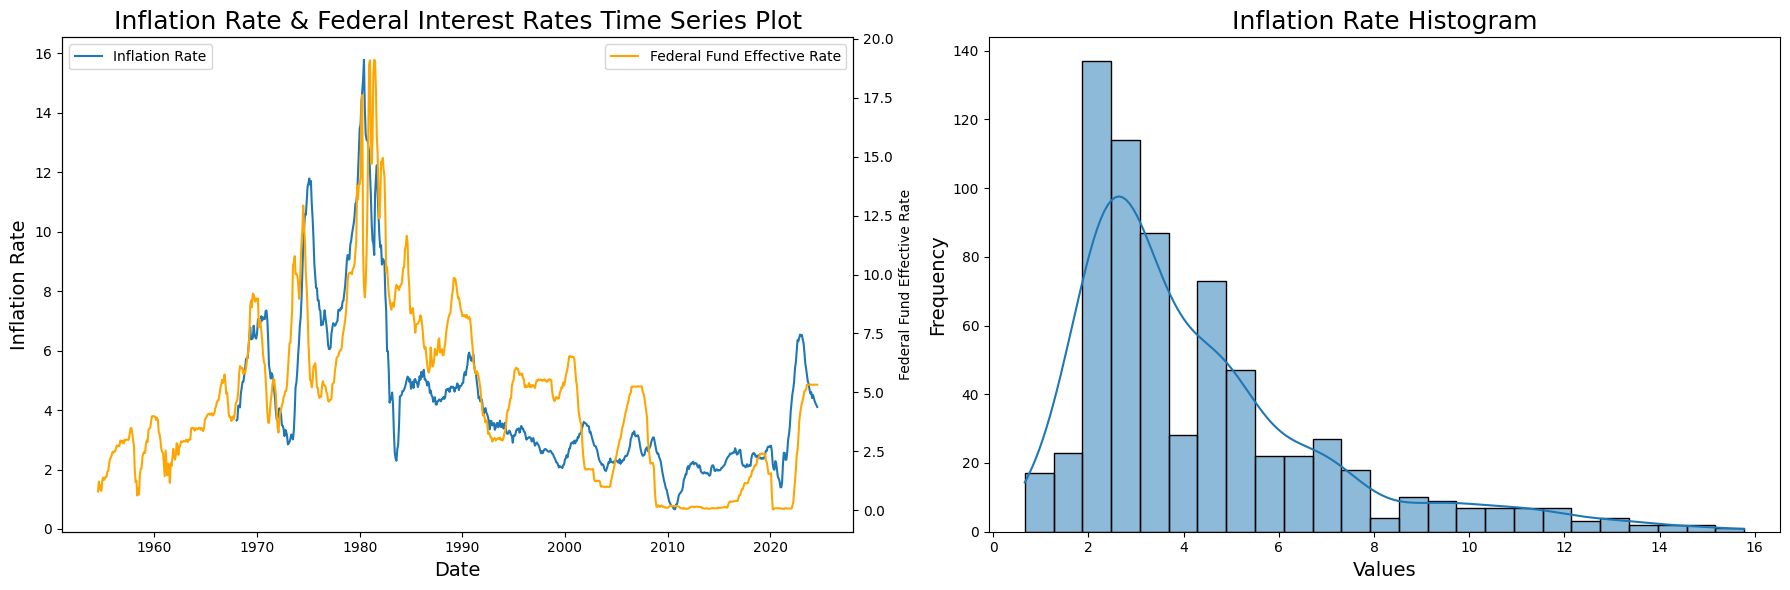

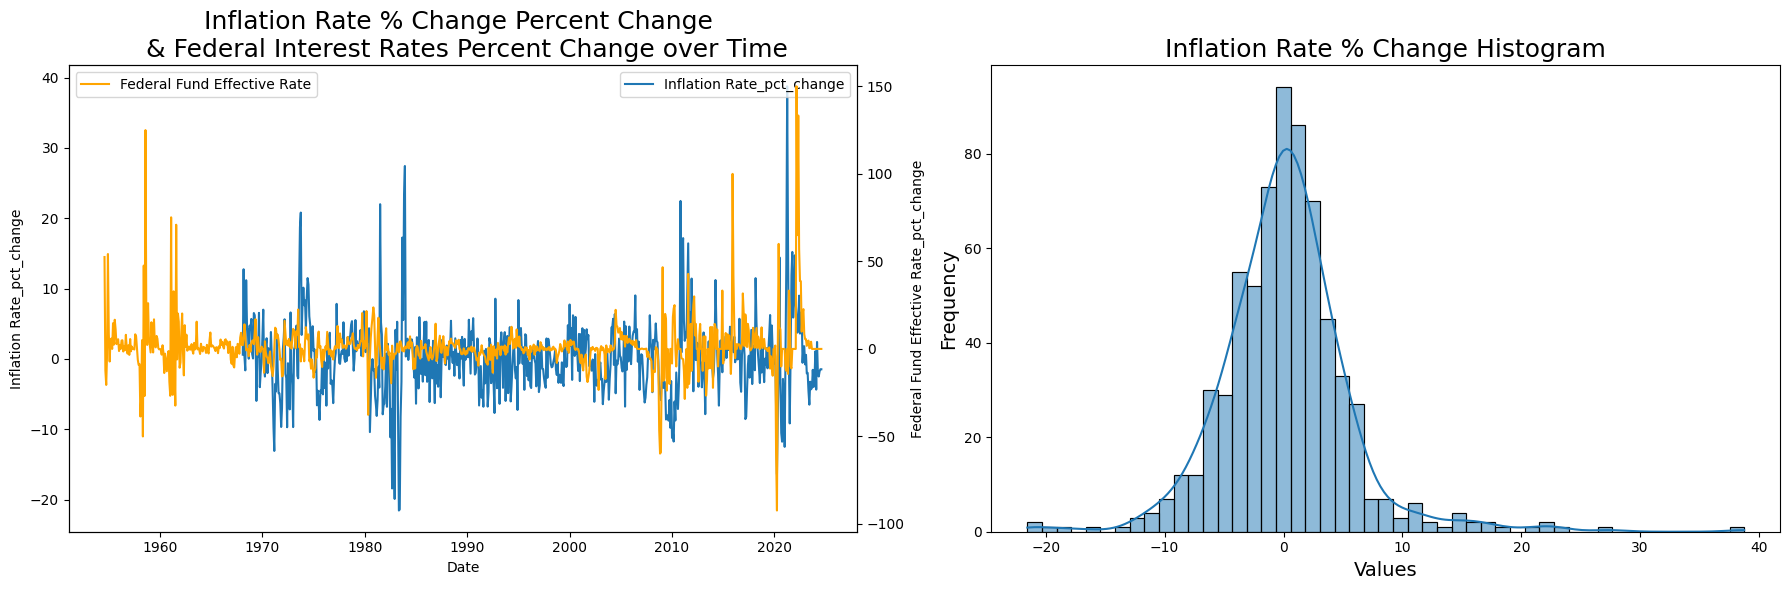

In [7]:
descriptive_stats(complete_df, 'Inflation Rate', 'Inflation Rate')
descriptive_stats_pct_change(complete_df, 'Inflation Rate_pct_change', 'Inflation Rate % Change')

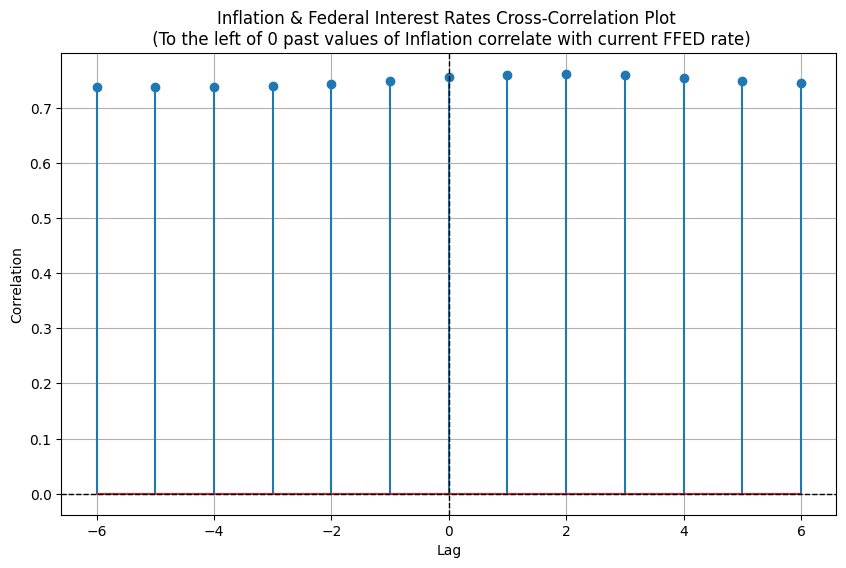

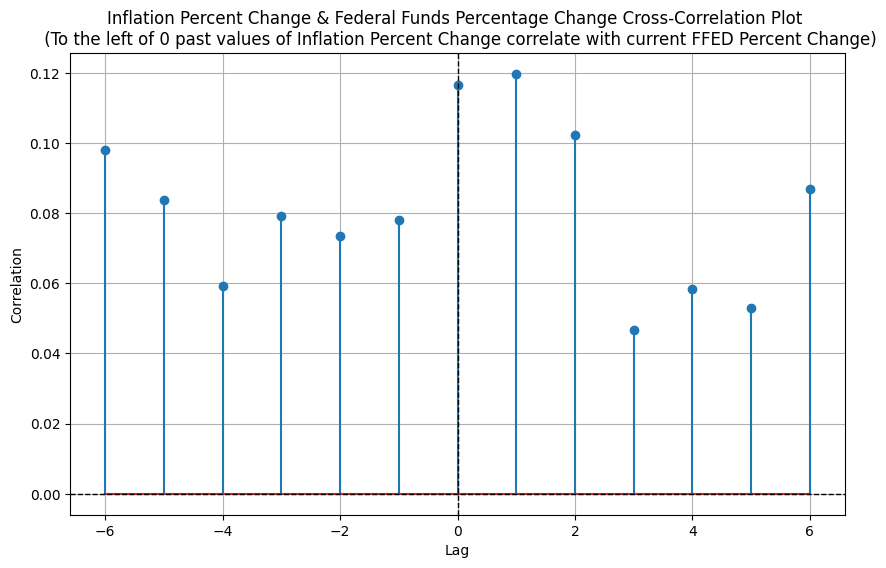

In [8]:
# Compute cross-correlation
cross_correlation(complete_df['Inflation Rate'], complete_df['Federal Fund Effective Rate'], max_lag, 'Inflation')
cross_correlation_pct_change(complete_df['Inflation Rate_pct_change'], complete_df['Federal Fund Effective Rate_pct_change'], max_lag, 'Inflation')


Nominal inflation rates appear to be strongly correlated with federal interest rates, but time series analysis suggests a reactive relationship. Specifically, inflation tends to respond to changes in the federal interest rate—when the FED cuts rates, inflation tends to drop, and when rates are hiked, inflation rises. This reactive dynamic is evident in both the time series and autocorrelation plots, where past values of the federal interest rate (and its percentage change) show stronger correlations with inflation than inflation leading the federal interest rate. This suggests that the federal interest rate acts as a driving force in controlling inflation rather than responding to it.

*Insight*: The federal interest rate is likely a key policy tool influencing inflation rather than reacting to it, which supports its use in inflation-targeting monetary policy frameworks.

#### Unemployment Rate

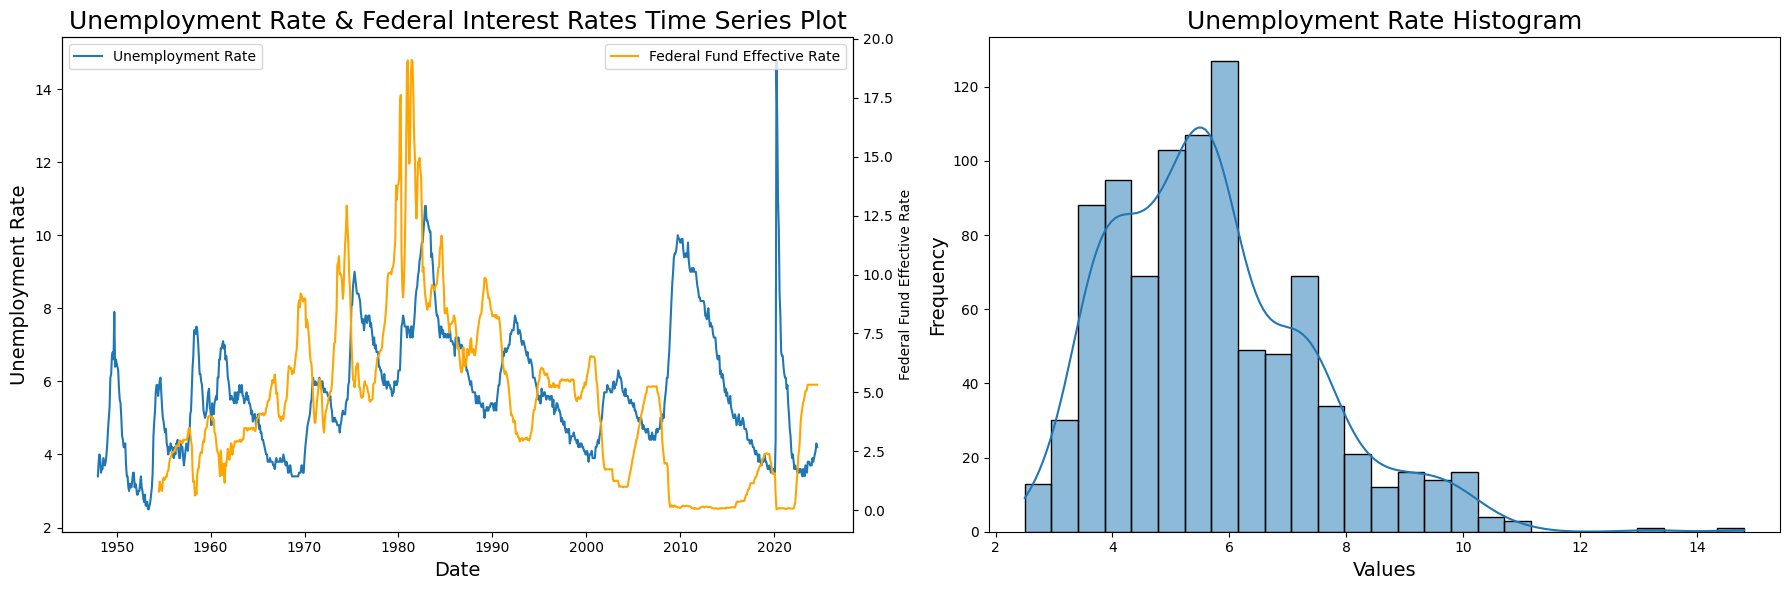

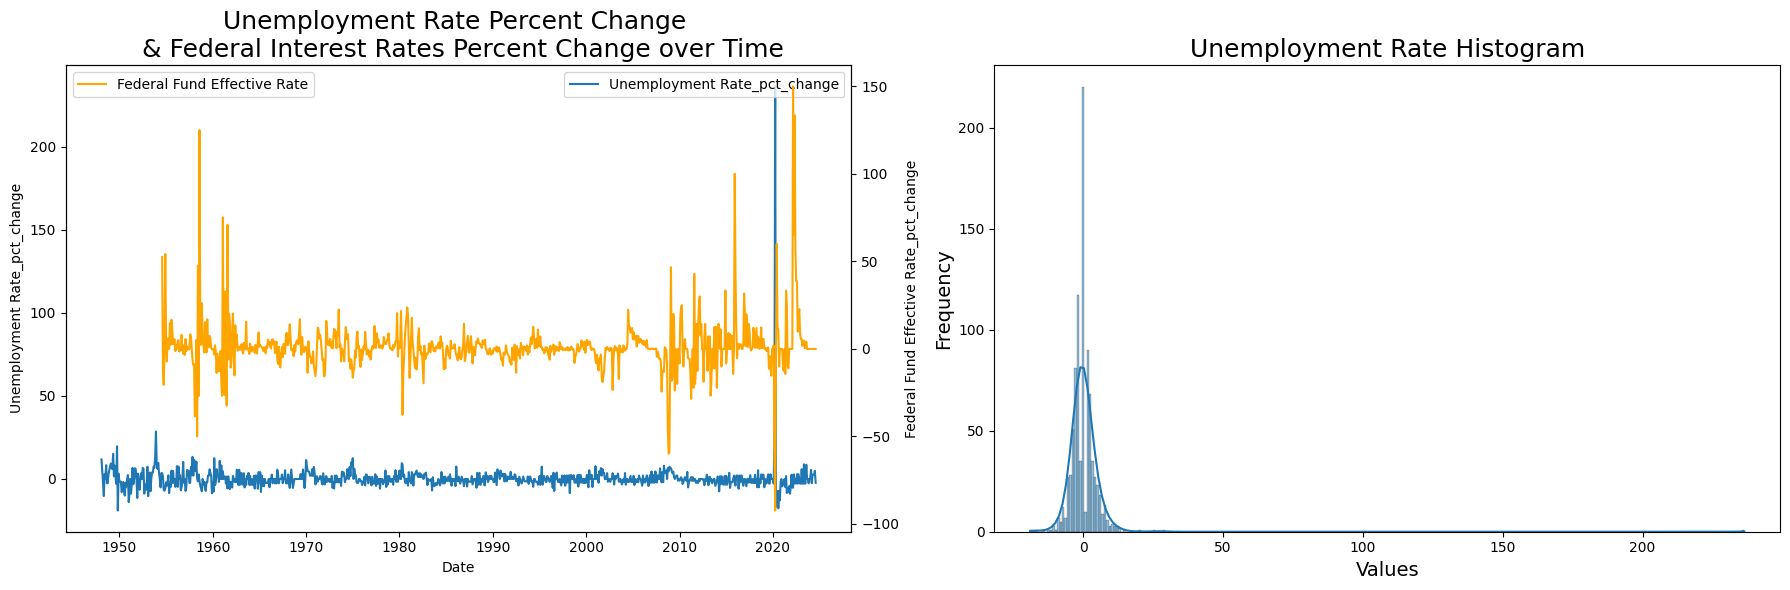

In [9]:
descriptive_stats(complete_df, 'Unemployment Rate', 'Unemployment Rate')
descriptive_stats_pct_change(complete_df, 'Unemployment Rate_pct_change', 'Unemployment Rate')

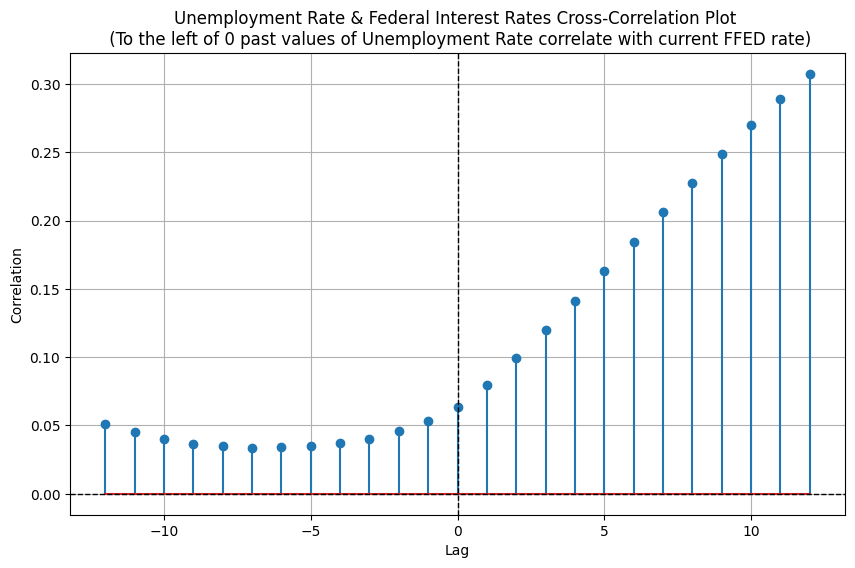

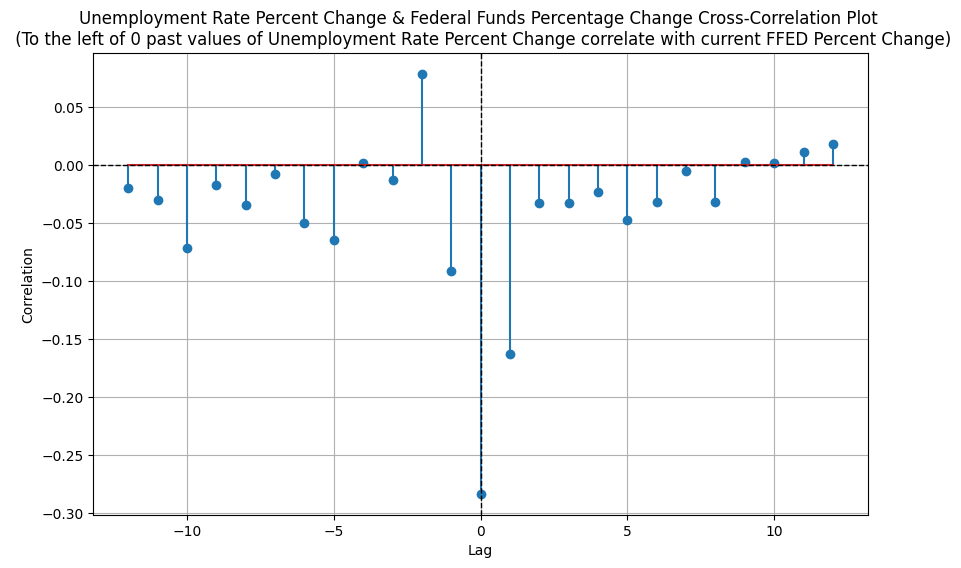

In [10]:
cross_correlation(complete_df['Unemployment Rate'], complete_df['Federal Fund Effective Rate'], 12, 'Unemployment Rate')
cross_correlation_pct_change(complete_df['Unemployment Rate_pct_change'], complete_df['Federal Fund Effective Rate_pct_change'], 12, 'Unemployment Rate')

Unemployment seems to lag behind the federal interest rate, with a more pronounced delay than inflation. The time series clearly shows a pattern where changes in the federal interest rate precede shifts in unemployment. Autocorrelation plots reveal that the impact of the federal interest rate on unemployment tends to manifest about a year later, indicating a delayed response in the labor market to interest rate changes.

*Insight*: This lag highlights the slower-moving nature of labor market adjustments compared to inflation, which could suggest the need for a patient approach in monetary policy when targeting employment.

#### Yield Curve: 10Y - 3M

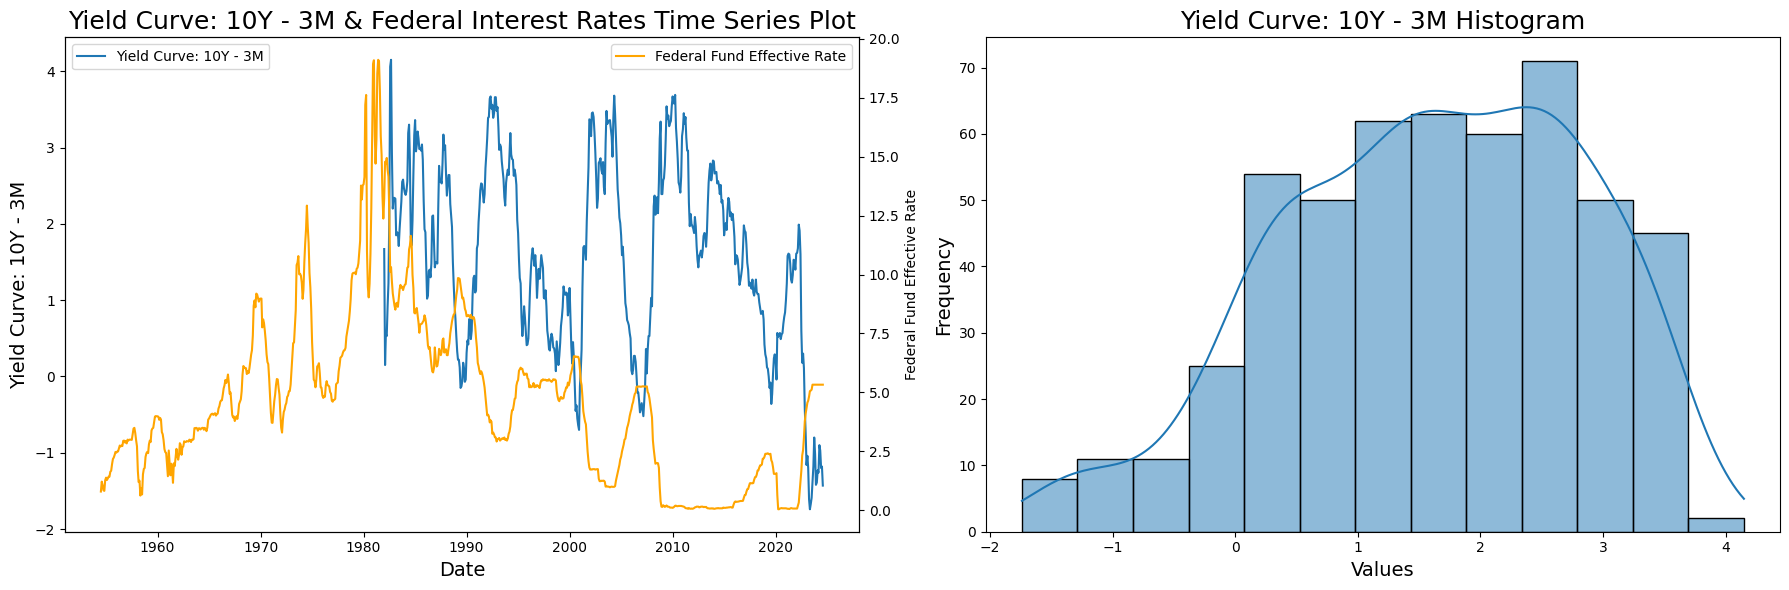

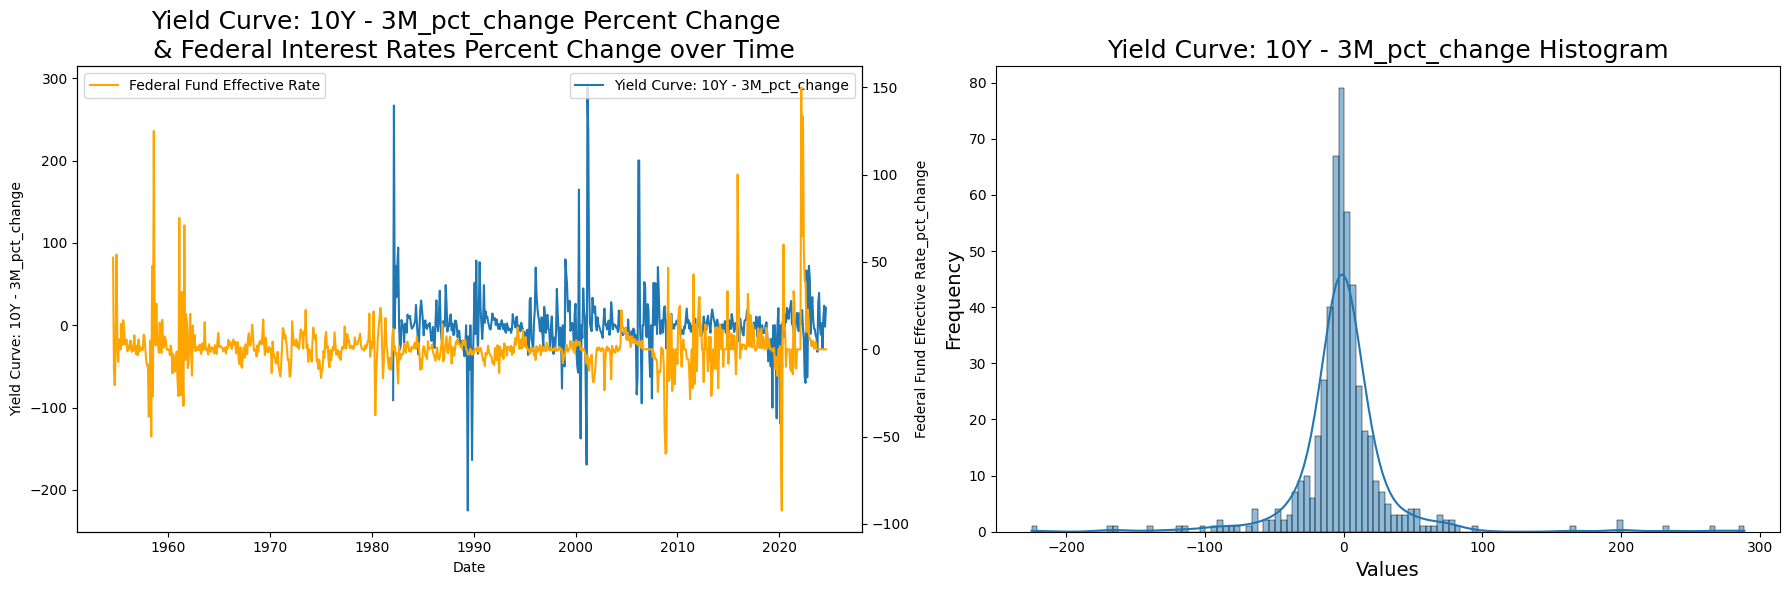

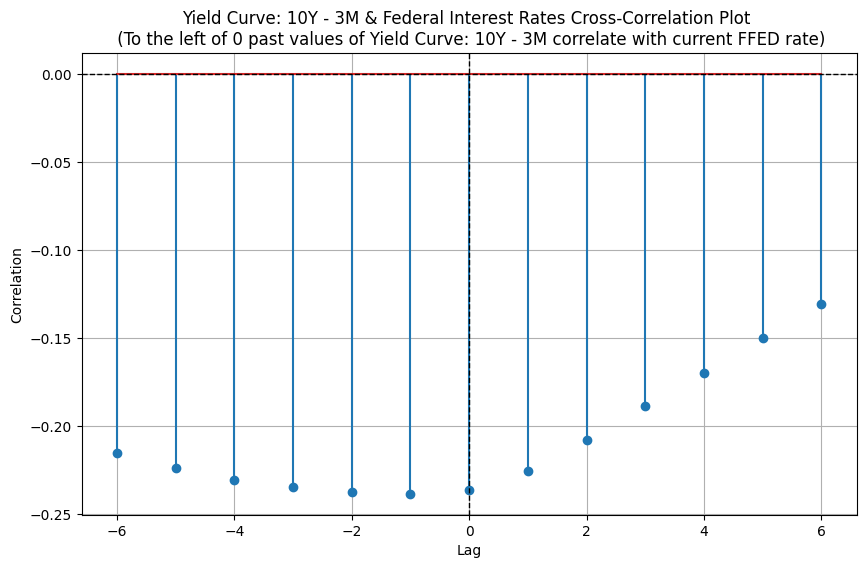

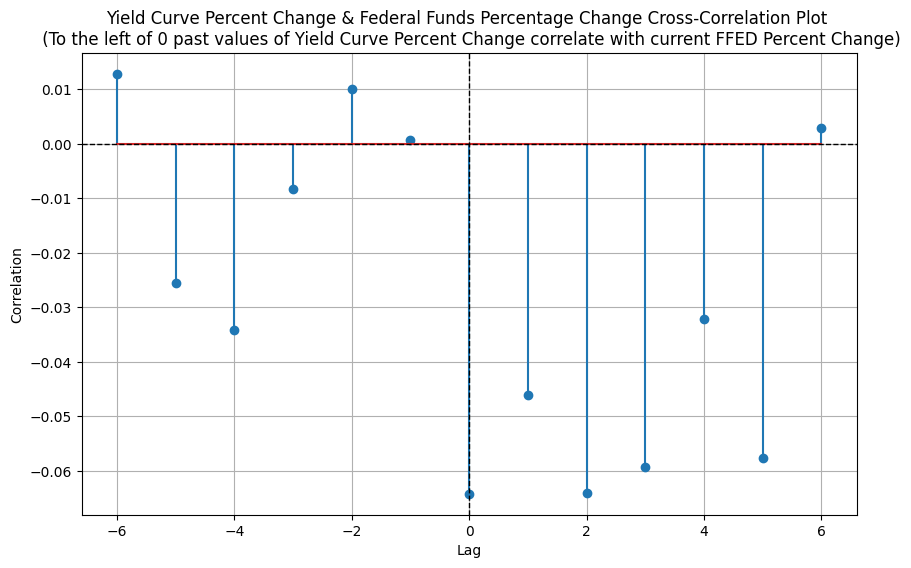

In [11]:
## filling outrageous values
complete_df.loc[(complete_df['Yield Curve: 10Y - 3M_pct_change'] > 300) |
                (complete_df['Yield Curve: 10Y - 3M_pct_change'] < -300),
                'Yield Curve: 10Y - 3M_pct_change'] = 0
descriptive_stats(complete_df, 'Yield Curve: 10Y - 3M', 'Yield Curve: 10Y - 3M')
descriptive_stats_pct_change(complete_df, 'Yield Curve: 10Y - 3M_pct_change', 'Yield Curve: 10Y - 3M_pct_change')
cross_correlation(complete_df['Yield Curve: 10Y - 3M'], complete_df['Federal Fund Effective Rate'], max_lag, 'Yield Curve: 10Y - 3M')
cross_correlation_pct_change(complete_df['Yield Curve: 10Y - 3M_pct_change'], complete_df['Federal Fund Effective Rate_pct_change'], max_lag, 'Yield Curve')

The time series reveals a negative relationship between the federal interest rate and the yield curve. When the FED raises rates, the yield curve often inverts, signaling potential economic downturns. Although the yield curve has been inverted for an extended period, future rate cuts may reverse this inversion. Autocorrelation plots suggest that the federal interest rate and the yield curve move in tandem rather than showing a clear lead-lag relationship.

*Insight*: The inversion of the yield curve could be a signal of market expectations for future rate cuts, but the tandem movement in autocorrelation may indicate that the yield curve and the federal interest rate adjust to broader economic conditions simultaneously.

#### Composite Leading Indicator

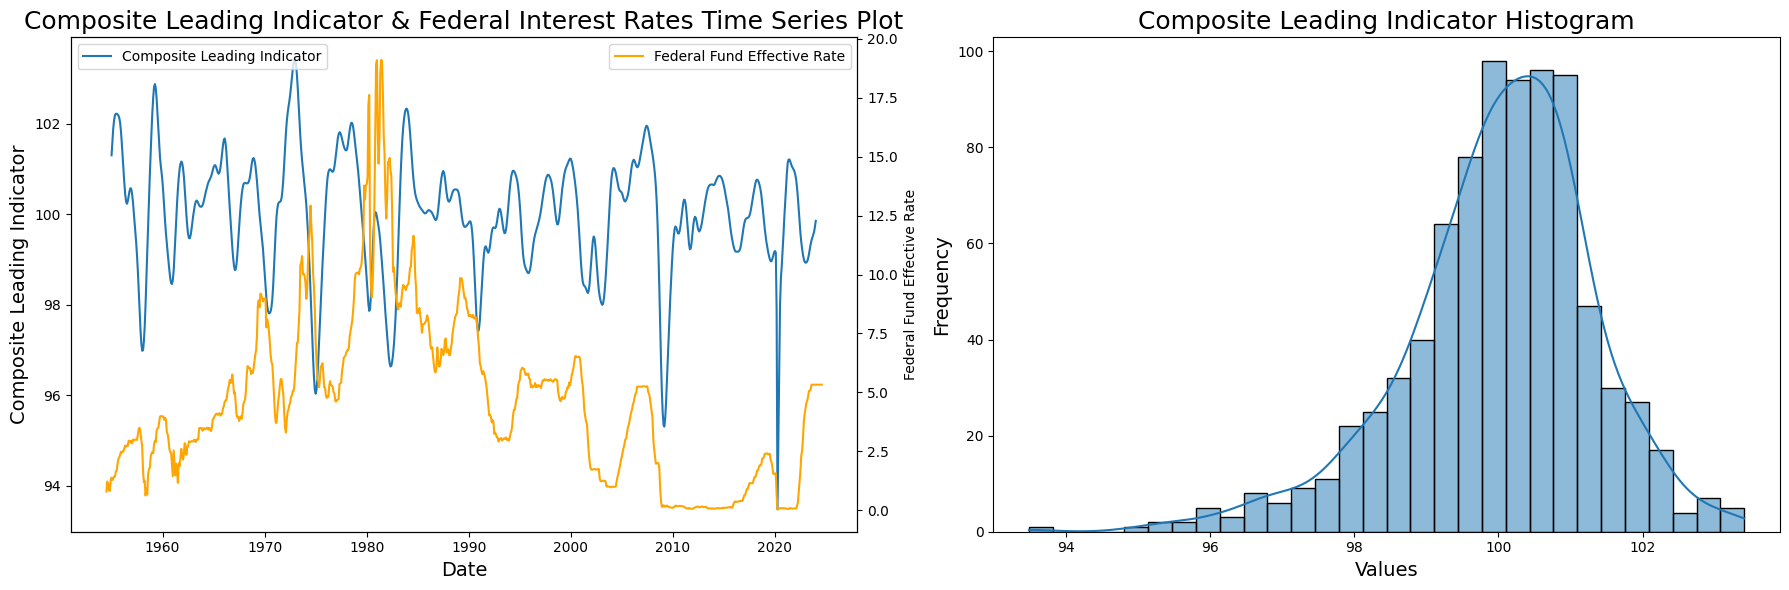

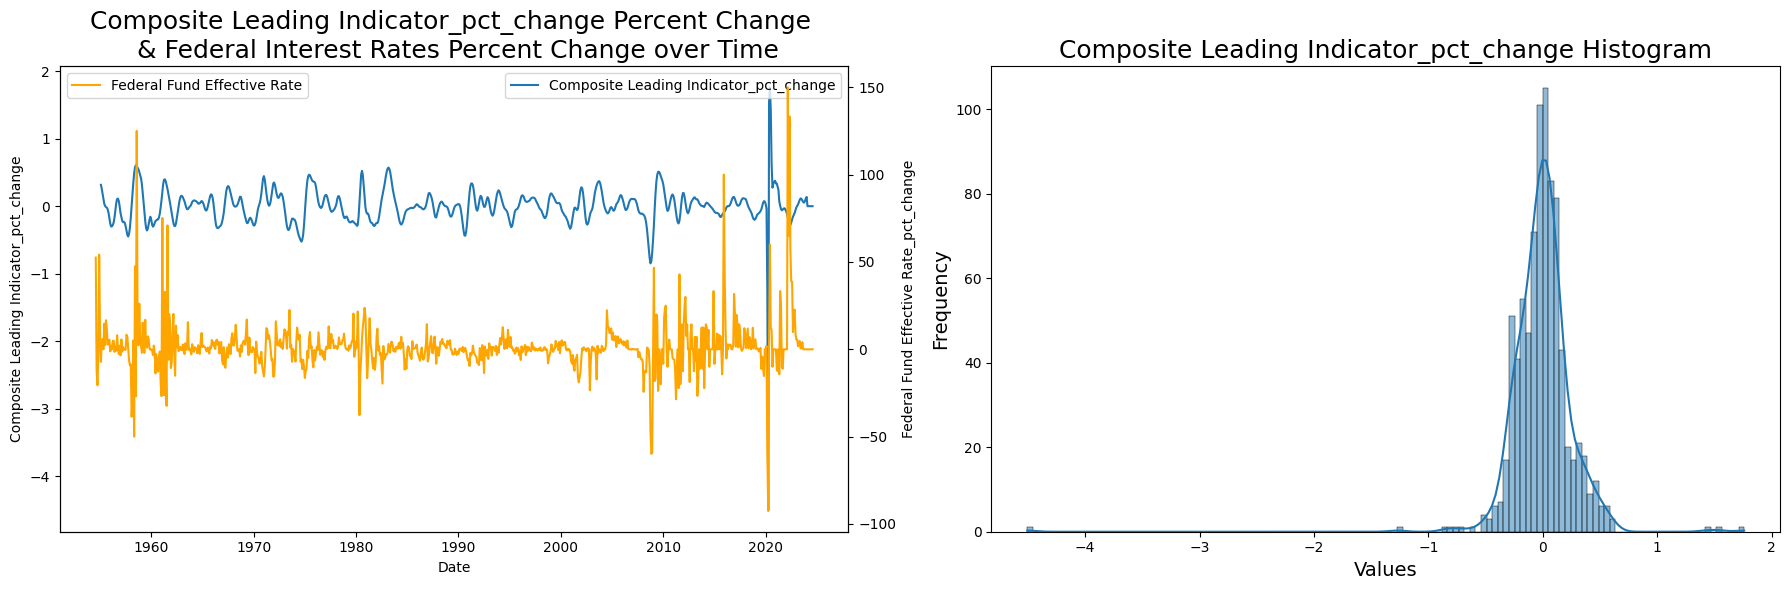

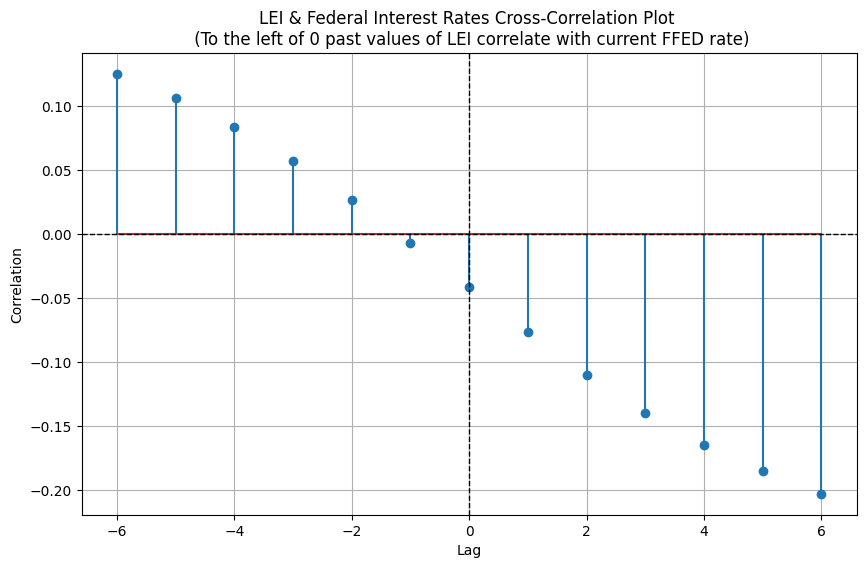

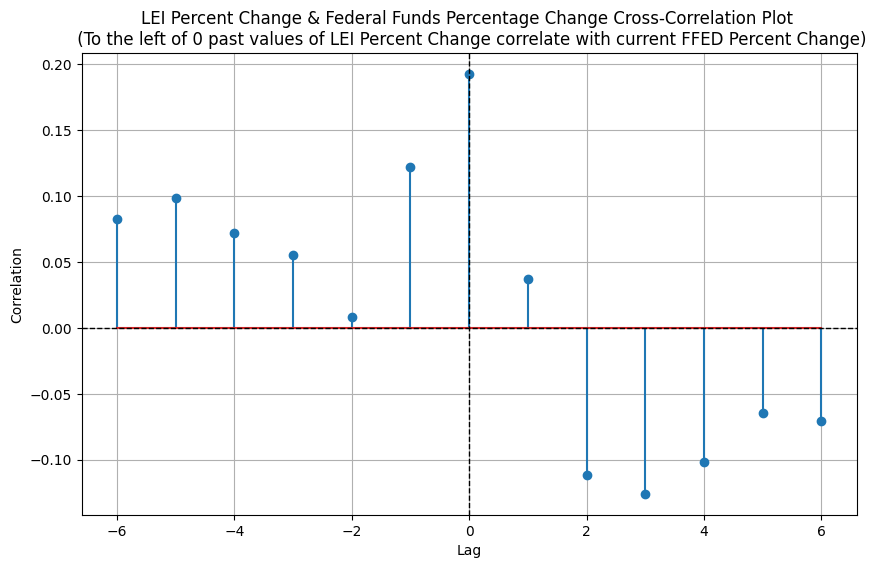

In [12]:
descriptive_stats(complete_df, 'Composite Leading Indicator', 'Composite Leading Indicator')
descriptive_stats_pct_change(complete_df, 'Composite Leading Indicator_pct_change', 'Composite Leading Indicator_pct_change')
cross_correlation(complete_df['Composite Leading Indicator'], complete_df['Federal Fund Effective Rate'], max_lag, 'LEI')
cross_correlation_pct_change(complete_df['Composite Leading Indicator_pct_change'], complete_df['Federal Fund Effective Rate_pct_change'], max_lag, 'LEI')

Post-1980, the LEI seems to serve as a useful leading indicator for the federal interest rate, particularly in predicting rate decreases. When the LEI falls, the federal interest rate often follows with a decrease shortly after. This pattern is visible in both the time series and autocorrelation plots, especially in percentage changes.

*Insight*: LEI could provide valuable early signals for monetary policy shifts, especially in terms of predicting rate cuts, which could be useful for forecasting interest rate trends.

#### GDP

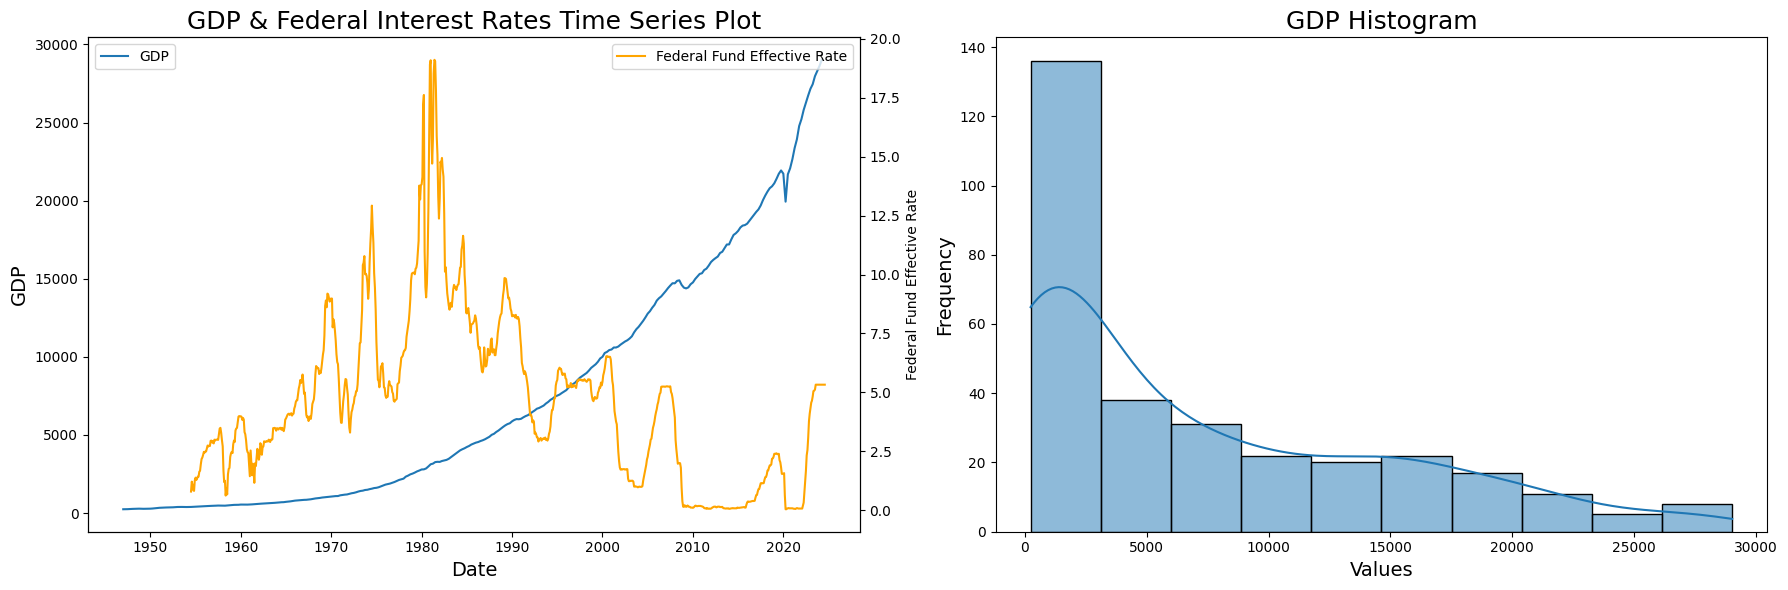

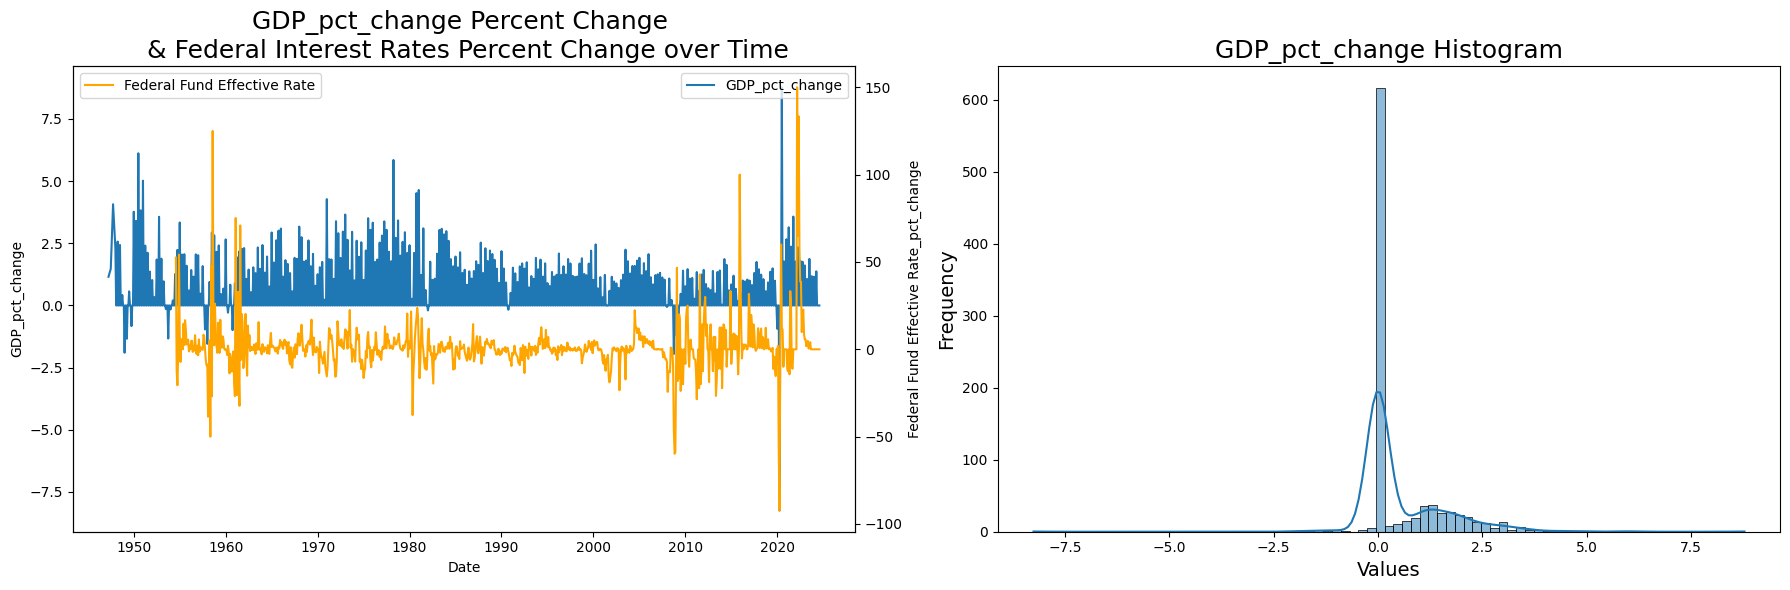

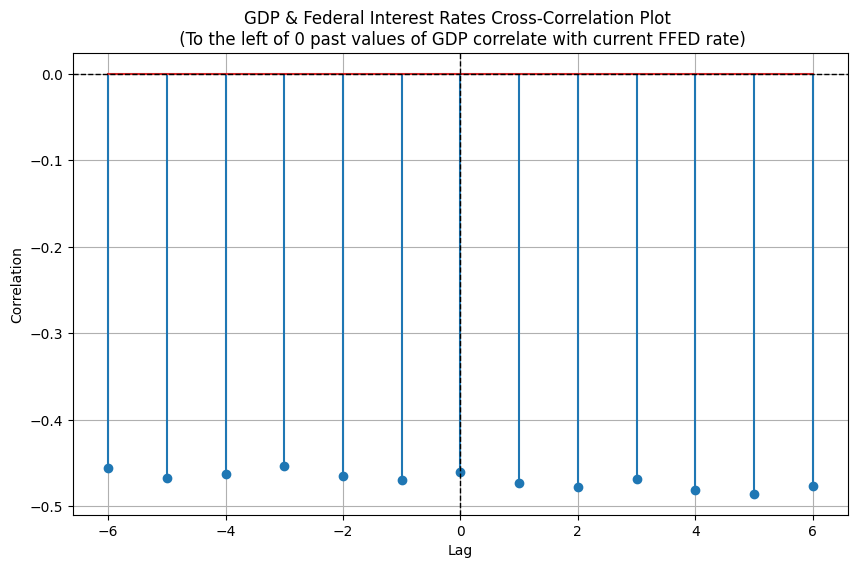

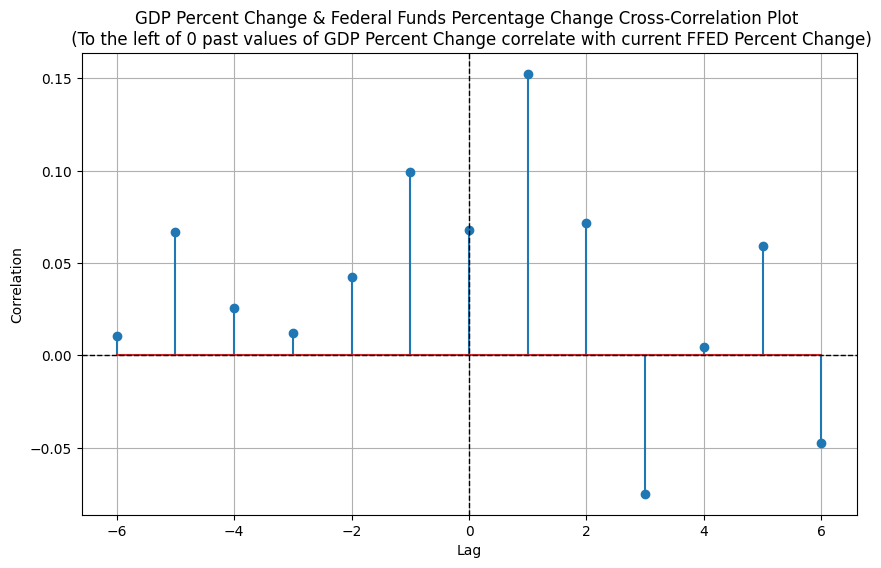

In [13]:
descriptive_stats(complete_df, 'GDP', 'GDP')
descriptive_stats_pct_change(complete_df, 'GDP_pct_change', 'GDP_pct_change')
cross_correlation(complete_df['GDP'], complete_df['Federal Fund Effective Rate'], max_lag, 'GDP')
cross_correlation_pct_change(complete_df['GDP_pct_change'], complete_df['Federal Fund Effective Rate_pct_change'], max_lag, 'GDP')

GDP has grown consistently alongside inflation and population increases over time, making it difficult to isolate its relationship with the federal interest rate. While GDP may not show a clear direct relationship with the federal interest rate in the short term, it will still be included in the model, though its predictive power may be limited.

*Insight*: Given the steady upward trend of GDP, it might not be as sensitive to short-term interest rate changes, but including it in the model could capture broader macroeconomic conditions.

#### Consumer Sentiment

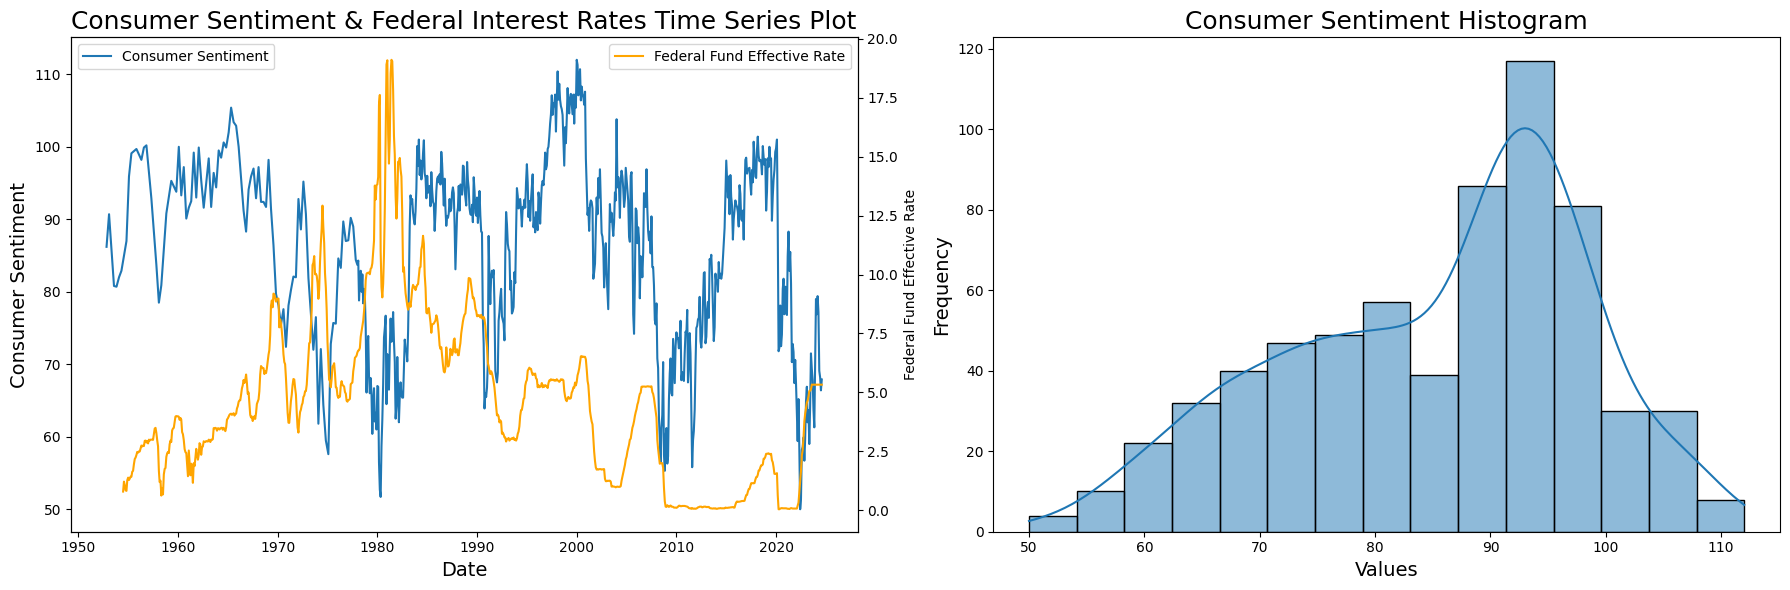

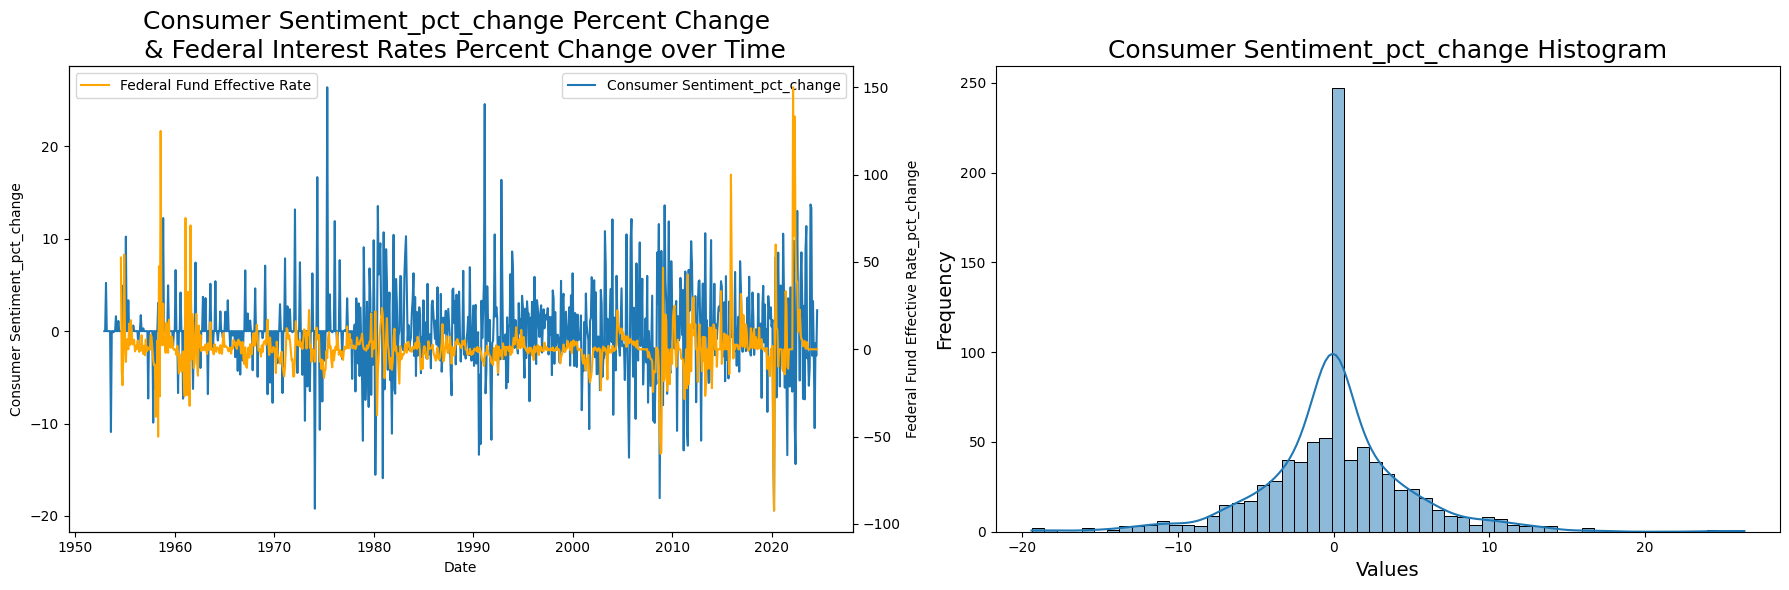

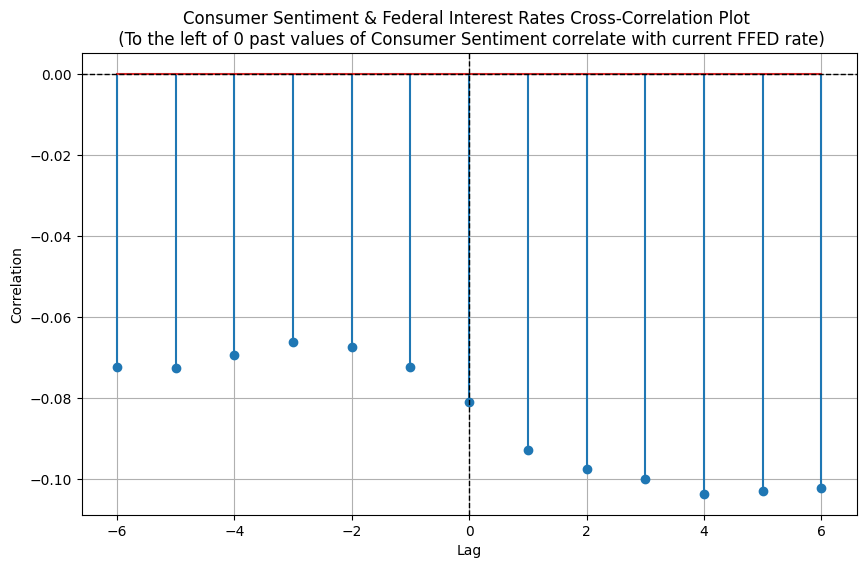

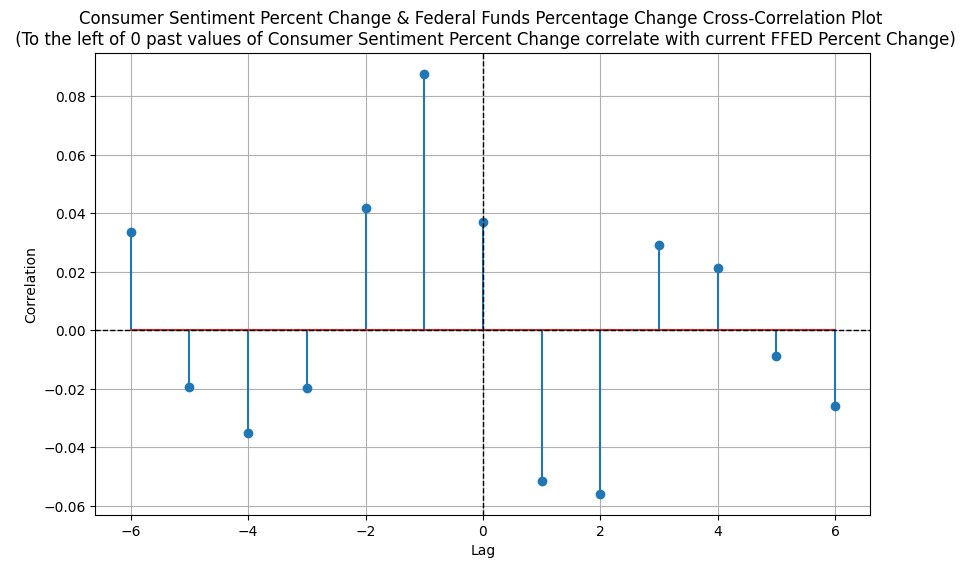

In [14]:
descriptive_stats(complete_df, 'Consumer Sentiment', 'Consumer Sentiment')
descriptive_stats_pct_change(complete_df, 'Consumer Sentiment_pct_change', 'Consumer Sentiment_pct_change')
cross_correlation(complete_df['Consumer Sentiment'], complete_df['Federal Fund Effective Rate'], max_lag, 'Consumer Sentiment')
cross_correlation_pct_change(complete_df['Consumer Sentiment_pct_change'], complete_df['Federal Fund Effective Rate_pct_change'], max_lag, 'Consumer Sentiment')

The relationship between consumer sentiment and the federal interest rate is not very obvious. While both variables generally move in the same direction, autocorrelation plots show little statistical significance in their relationship, making it hard to derive meaningful insights.

*Insight*: Consumer sentiment might be a coincident or even lagging indicator of interest rates, driven by broader economic factors rather than directly influencing the federal interest rate.



#### Coincident Indicators

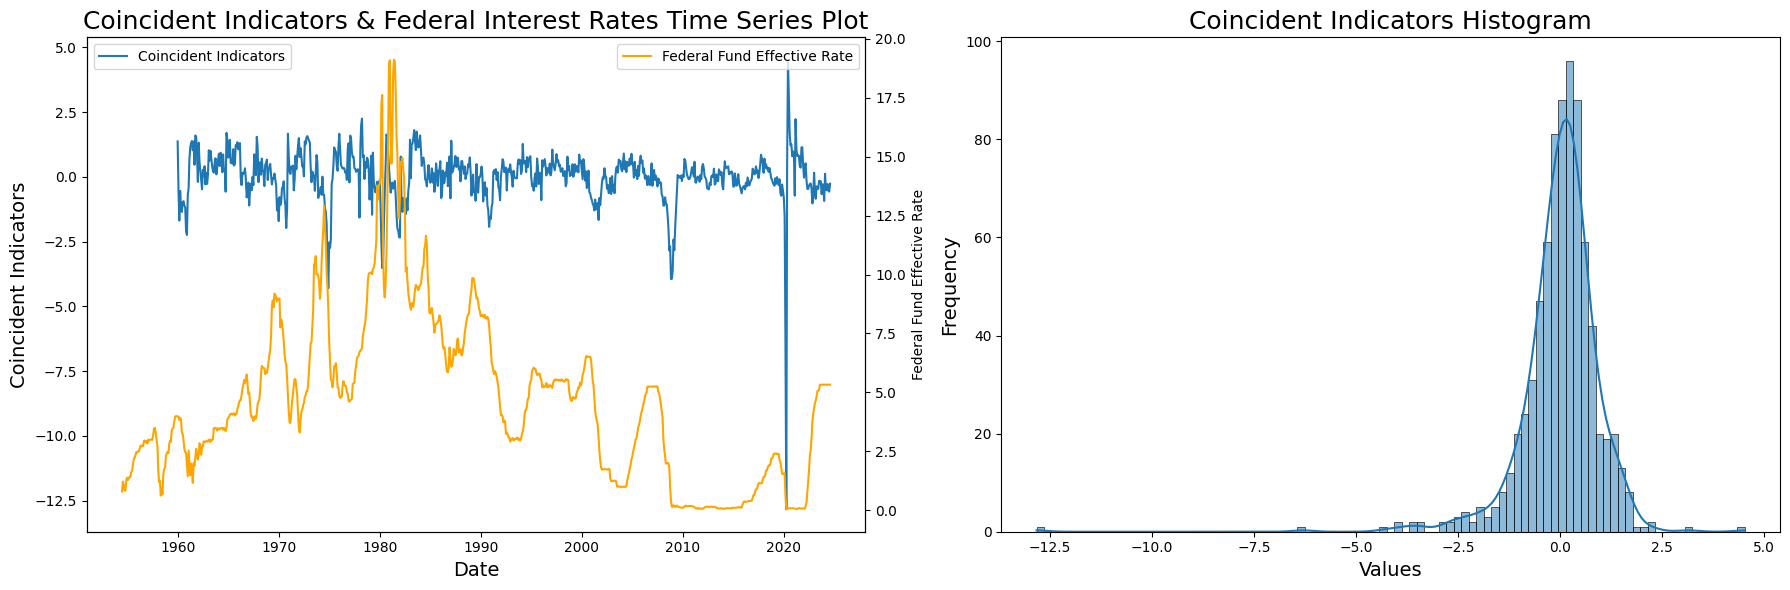

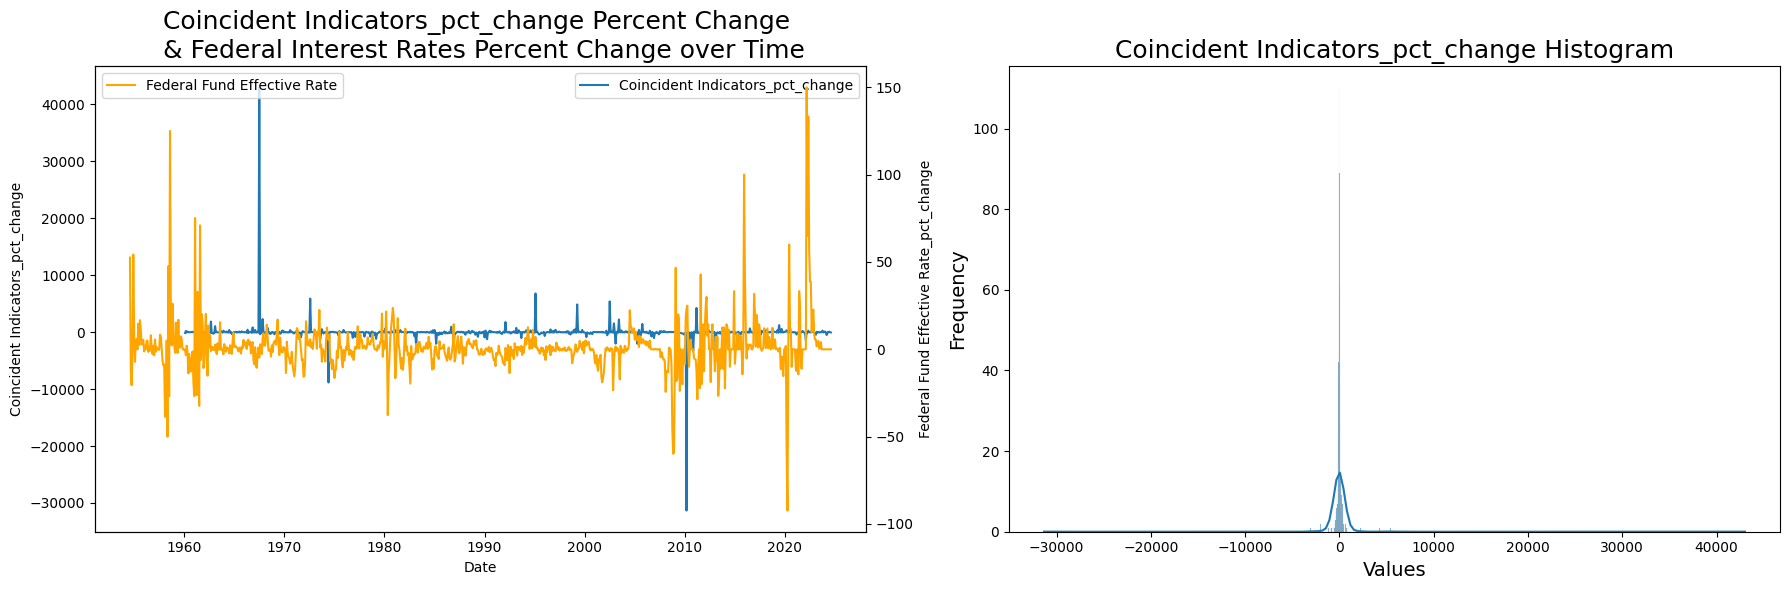

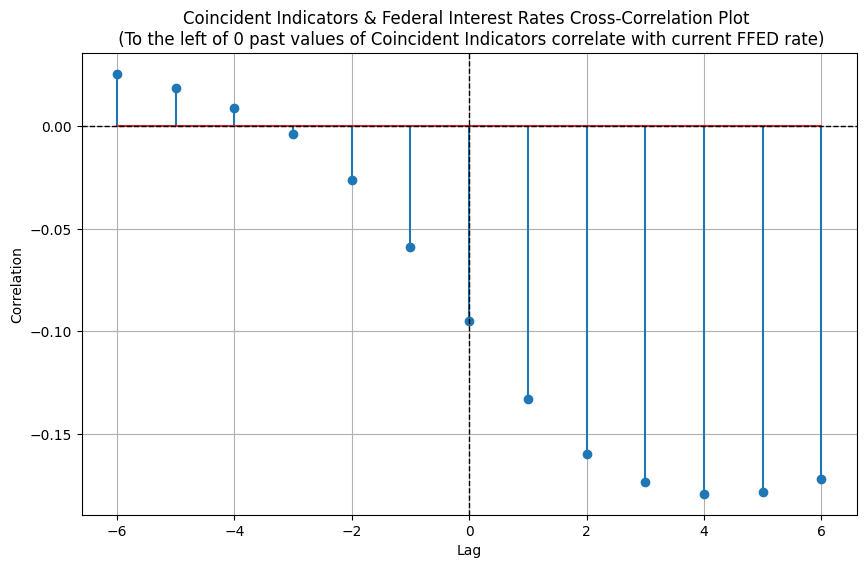

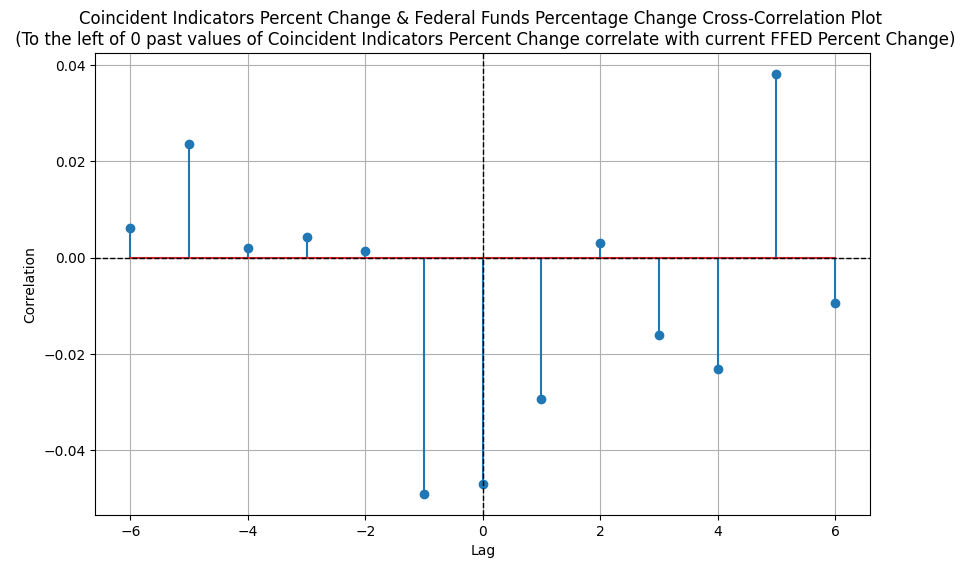

In [15]:
descriptive_stats(complete_df, 'Coincident Indicators', 'Coincident Indicators')
descriptive_stats_pct_change(complete_df, 'Coincident Indicators_pct_change', 'Coincident Indicators_pct_change')
cross_correlation(complete_df['Coincident Indicators'], complete_df['Federal Fund Effective Rate'], max_lag, 'Coincident Indicators')
cross_correlation_pct_change(complete_df['Coincident Indicators_pct_change'], complete_df['Federal Fund Effective Rate_pct_change'], max_lag, 'Coincident Indicators')

Coincident indicators and the federal interest rate generally move in opposite directions, although the relationship is relatively weak. This suggests that while there might be some inverse correlation, it is not strong enough to make reliable predictions solely based on coincident indicators.

*Insight*: Coincident indicators, by their nature, reflect current economic conditions, which may not be as useful for forecasting movements in the federal interest rate but could still provide context for interpreting current rate decisions.

### 2. Using the framework identified in question 1 and expounding potentially, give the current status of the US government/economy.

Given the graphs explored in question 1, we could argue that the US economy is in a slowdown, that is, the moment before a recession. A key argument to make this point is the fact that the unemployment rate has been consistently escalating (currently at 4.2%) , showing a general sentiment or idea of uncertainty for the future of the economy. This value is still below the 5% line, so it is stil controlled, but the fact that it has continuously risen is a tell that the economy may be entering a recession soon.

### 3. **Make a case for what should happen at the next Fed meeting** (not the meeting on Wednesday, September 18, 2024) based on the data your group identified. What are some things that could happen that would change your opinion and explain why.

We have explored different trends on the economic cycle based on past events and have understood the current situation to be pre-recessionary. The most relevant trend is that during the period prior to the start of a recession, the government lowers interest rates to keep the investment levels controlled. In that sense, and given what happened on September 18th, we believe the Fed is likely to hold this new low rate during the next meeting or even lower it further depending on the magnitude of the recession.

### 4. **Create a linear regression model** to predict the size of the rate hike/cut for the next Fed meeting (not the meeting on Wednesday, September 18, 2024). **Discuss the confidence** you have in your results and the implications for the economy.

In [16]:
complete_df.columns

Index(['Federal Fund Effective Rate', 'Inflation Rate', 'GDP',
       'Unemployment Rate', 'Consumer Sentiment',
       'Composite Leading Indicator', 'Yield Curve: 10Y - 3M',
       'Coincident Indicators', 'Lagging Indicators', 'Recession Indicators',
       'Federal Fund Effective Rate_pct_change', 'Inflation Rate_pct_change',
       'GDP_pct_change', 'Unemployment Rate_pct_change',
       'Consumer Sentiment_pct_change',
       'Composite Leading Indicator_pct_change',
       'Yield Curve: 10Y - 3M_pct_change', 'Coincident Indicators_pct_change',
       'Lagging Indicators_pct_change'],
      dtype='object')

In [17]:
# Extract the latest data point
latest_inflation_rate = inflation_rate.iloc[-1]
latest_gdp = gdp.iloc[-1]
latest_unemployment_rate = unemployment_rate.iloc[-1]
latest_consumer_sentiment = consumer_sentiment.iloc[-1]
latest_composite_leading_indicator = cli.iloc[-1]
latest_yield_curve = yield_curve.iloc[-1]
latest_coincident_indicators = coincident.iloc[-1]
current_rate = federal_fund_effective_rate.iloc[-1]

# Create a DataFrame for the latest data
latest_data = pd.DataFrame({
    'Federal Fund Effective Rate': [current_rate],
    'Inflation Rate': [latest_inflation_rate],
    'GDP': [latest_gdp],
    'Unemployment Rate': [latest_unemployment_rate],
    'Consumer Sentiment': [latest_consumer_sentiment],
    'Composite Leading Indicator': [latest_composite_leading_indicator],
    'Yield Curve: 10Y - 3M': [latest_yield_curve],
    'Coincident Indicators': [latest_coincident_indicators]
})


In [18]:
# Helper function for model training and making prediction

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

def train_predict_rate_model(model, complete_df, latest_data):
    # Define features(X) and target (y)
    X = complete_df[['Inflation Rate',
                     'GDP',
                     'Unemployment Rate',
                     'Consumer Sentiment',
                     'Composite Leading Indicator',
                     'Yield Curve: 10Y - 3M',
                     'Coincident Indicators']]
    y = complete_df['Federal Fund Effective Rate']

    # Drop rows with missing values
    X_clean = X.dropna()
    y_clean = y[X_clean.index]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.4, random_state=42)

    # Train the provided model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model performance
    r_squared = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print("Model Evaluation:")
    # Create a dictionary with the evaluation metrics
    data = {
        'Metric': ['R_Squared', 'MSE'],
        'Value': [f'{r_squared:.3f}', f'{mse:.3f}']
    }   
    df = pd.DataFrame(data)

    # Apply right-alignment by using rjust for both columns
    #df['Metric'] = df['Metric'].apply(lambda x: x.rjust(10))
    df['Value'] = df['Value'].apply(lambda x: x.rjust(10))
    print(df.to_string(index=False))
    print("")

    # Predict the Federal Fund Effective Rate using the latest data
    predicted_rate = model.predict(latest_data.drop(columns=['Federal Fund Effective Rate']))

    # get current rate
    current_rate = latest_data['Federal Fund Effective Rate'][0]

    # Calculate the rate change (hike/cut)
    rate_change = predicted_rate[0] - current_rate # current
    print("Prediction:")

    # Create a dictionary with the evaluation metrics
    data1 = {
        'Description': [
            'Predicted Federal Fund Effective Rate',
            'Current Federal Fund Effective Rate',
            'Predicted Rate Change (Hike/Cut)'
        ],
        'Value': [
            f'{predicted_rate[0]:.2f}%',
            f'{current_rate:.2f}%',
            f'{rate_change:.2f}%'
        ]
    }

    # Create a DataFrame
    df1 = pd.DataFrame(data1)

    # Apply right-alignment only for the 'Value' column
    df1['Value'] = df1['Value'].apply(lambda x: x.rjust(10))

    # Print the DataFrame
    print(df1.to_string(index=False))

#### LinearRegression

In [19]:
from sklearn.linear_model import LinearRegression

train_predict_rate_model(LinearRegression(), complete_df, latest_data)

Model Evaluation:
   Metric      Value
R_Squared      0.903
      MSE      1.058

Prediction:
                          Description      Value
Predicted Federal Fund Effective Rate      2.67%
  Current Federal Fund Effective Rate      5.13%
     Predicted Rate Change (Hike/Cut)     -2.46%


#### **Discuss the confidence** you have in your results and the implications for the economy.
The R squared score is 0.9 which means that 90% of the variation in the Federal Fund Effective Rate can be explained by the independent variables (Inflation Rate, GDP, Unemployment Rat, Consumer Sentiment, Composite Leading Indicator, Yield Curve: 10Y - 3M, Coincident Indicators). This high R squared score typically refelcts a good fit, meaning the model captures a big amount of relationships between dependent and independent variables.\
The MSE is 1.05, the relatively low mean squarted error means the predicted federal fund effective rate is close the the true value.\
However, although the model suggests a high accuracy, the federal fund rate actually is related to lots of factors in political, monetary, and economic area, and will affect by many sudden effects. Also, the model based on historical data may cannot fully capture the sudden events.\
The model shows a sharp decrease from 5.13% to 2.67% in federal fund effective rate, which is a strong indicators that economic conditions was pointing toward a slowdown or the need for more accommodative monetary policy. Central banks typically lower interest rates to stimulate borrowing, investment, and consumer spending to prevent a potential recession in economy.

### 5. **Create a classification model** to classify the current US economy as either “In recession” or “Not In Recession.” **Discuss the confidence** you have in your results and the implications for the economy. Is the economy already in a recession based on your analysis?

In [20]:
complete_df.tail(5)

,Federal Fund Effective Rate,Inflation Rate,GDP,Unemployment Rate,Consumer Sentiment,Composite Leading Indicator,Yield Curve: 10Y - 3M,Coincident Indicators,Lagging Indicators,Recession Indicators,Federal Fund Effective Rate_pct_change,Inflation Rate_pct_change,GDP_pct_change,Unemployment Rate_pct_change,Consumer Sentiment_pct_change,Composite Leading Indicator_pct_change,Yield Curve: 10Y - 3M_pct_change,Coincident Indicators_pct_change,Lagging Indicators_pct_change
2024-04-01,5.33,4.412395,29016.714,3.9,77.2,NaN,-0.90,-0.518885,NaN,0.0,0.0,-2.147115,1.37173,2.631579,-2.770781,0.0,-28.571429,9.514086,0.0
2024-05-01,5.33,4.302023,NaN,4.0,69.1,NaN,-0.97,-0.274460,NaN,0.0,0.0,-2.501388,0.00000,2.564103,-10.492228,0.0,7.777778,-47.105706,0.0
2024-06-01,5.33,4.226876,NaN,4.1,68.2,NaN,-1.20,-0.527516,NaN,0.0,0.0,-1.746797,0.00000,2.500000,-1.302460,0.0,23.711340,92.201218,0.0
2024-07-01,5.33,4.164951,NaN,4.3,66.4,NaN,-1.18,-0.569746,NaN,0.0,0.0,-1.465028,0.00000,4.878049,-2.639296,0.0,-1.666667,8.005279,0.0
2024-08-01,5.33,4.103706,NaN,4.2,67.9,NaN,-1.43,-0.261935,NaN,0.0,0.0,-1.470485,0.00000,-2.325581,2.259036,0.0,21.186441,-54.026052,0.0


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

def train_predict_recession_model(model, complete_df, latest_data):

    # All economic indicators
    X = complete_df[['Federal Fund Effective Rate',
                     'Inflation Rate',
                     'GDP',
                     'Unemployment Rate',
                     'Consumer Sentiment',
                     'Composite Leading Indicator',
                     'Yield Curve: 10Y - 3M',
                     'Coincident Indicators']]

    # Recession Indicator
    y = complete_df['Recession Indicators']

    # Drop rows with missing values
    X_clean = X.dropna()
    y_clean = y[X_clean.index]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.4, random_state=42)

    # Train a Random Forest Classifier
    classifier = model
    classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    print("Model Evaluation:")
    # Print classification report for more detailed performance metrics
    print(classification_report(y_test, y_pred, digits=3))

    # Confusion matrix to see false positives/negatives
    conf_matrix = confusion_matrix(y_test, y_pred, labels = [1,0])
    print(f'Confusion Matrix:\n{conf_matrix}')

    # Predict if the current economy is in a recession
    current_recession_prediction = classifier.predict(latest_data)

    if current_recession_prediction == 1:
        print("\nPrediction:\nThe model predicts that the economy is currently in a recession.")
    else:
        print("\nPrediction:\nThe model predicts that the economy is not in a recession.")



#### RandomForestClassifier

In [22]:
train_predict_recession_model(RandomForestClassifier(n_estimators=100, random_state=42), complete_df, latest_data)

Model Evaluation:
              precision    recall  f1-score   support

         0.0      0.984     1.000     0.992        61
         1.0      1.000     0.857     0.923         7

    accuracy                          0.985        68
   macro avg      0.992     0.929     0.957        68
weighted avg      0.986     0.985     0.985        68

Confusion Matrix:
[[ 6  1]
 [ 0 61]]

Prediction:
The model predicts that the economy is not in a recession.


In [23]:
complete_df['Recession Indicators'].value_counts()

Recession Indicators
0.0    804
1.0    124
Name: count, dtype: int64

#### **Discuss the confidence** you have in your results and the implications for the economy. Is the economy already in a recession based on your analysis?
The accuracy is 0.985, which is a pretty high accuracy means the almost all the classifications are predicted correctly. However, The false negative is 1, which means the model predict a economy is 'not in recession' which actually the economy is 'in recession'. Also, the dataset is imbalanced with 0 class(not in recession) much more than 1 class(in ression), which may make the model have limit samples on 'recession economy' to learn and thus have a relative low accuracy when predict correctly when economy is actually in recession.\
The model indicates the current economy is not in a recession, which is a still reliable conclusion although there is a possible change that it is also a false negative prediction. Thus, the 'not in recession' indicator means that the current economy is in a stable status. Although there are some potential negative trending on GDP, inflation rate, unemployment rate, or so forth, the economy does not to a extent of recession, and it is just a normal fluctuations in the current economy.

## *682 Only*

### 6. **Create a nonlinear regression model** to predict the size of the rate hike/cut for the next Fed meeting (not the meeting on Wednesday, September 18, 2024).

#### RandomForestRegressor

In [24]:
from sklearn.ensemble import RandomForestRegressor

train_predict_rate_model(RandomForestRegressor(n_estimators=100, random_state=42), complete_df, latest_data)

Model Evaluation:
   Metric      Value
R_Squared      0.953
      MSE      0.512

Prediction:
                          Description      Value
Predicted Federal Fund Effective Rate      4.98%
  Current Federal Fund Effective Rate      5.13%
     Predicted Rate Change (Hike/Cut)     -0.15%


#### Discuss results:

This model is used to predict a future Federal Fund Effective Rate based on various independent variables.

The R squared score is 0.95 which means that 95% of the variation in the Federal Fund Effective Rate can be explained by the independent variables (Inflation Rate, GDP, Unemployment Rate, Consumer Sentiment, Composite Leading Indicator, Yield Curve: 10Y - 3M, Coincident Indicators).

This R-squared value is strong and reflects that our model is a good fit for predicting federal funds rate.

The MSE is 0.51 which is fairly low and shows that the predicted funds rate are often close to the actual values.

The model predicts that the next rate cut will be -0.35%, giving a predicted future federal funds effective rate of 4.98%.

### 7. **Create a classification model** to classify the future US Economy as either “In recession” or “Not In Recession” for 1 month, 3 months, and 6 months into the future. {3 different models}

We are using 3 different models for 3 different time periods (1, 3, and 6 months).

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn import metrics

def train_predict_recession_model(model, complete_df, latest_data, shift_period):
    # Shift the recession indicator by the given period to predict future recession status
    complete_df[f'Recession_{shift_period}M_Future'] = complete_df['Recession Indicators'].shift(-shift_period)

    # Drop rows with NaN values after shifting
    complete_df_clean = complete_df.dropna(subset=[f'Recession_{shift_period}M_Future'])

    # All economic indicators as features
    X = complete_df_clean[['Federal Fund Effective Rate',
                     'Inflation Rate',
                     'GDP',
                     'Unemployment Rate',
                     'Consumer Sentiment',
                     'Composite Leading Indicator',
                     'Yield Curve: 10Y - 3M',
                     'Coincident Indicators']]

    # Future Recession Indicator
    y = complete_df_clean[f'Recession_{shift_period}M_Future']

    # Drop rows with missing values in the feature set
    X_clean = X.dropna()
    y_clean = y[X_clean.index]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.4, random_state=42)

    # Train the model
    classifier = model
    classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    print(f"Model Evaluation for {shift_period}-month prediction:")
    # Print classification report for more detailed performance metrics
    print(classification_report(y_test, y_pred, digits=3))

    # Confusion matrix to see false positives/negatives
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix for {shift_period}-month prediction:\n{conf_matrix}')

    # Predict if the economy will be in a recession in `shift_period` months using the latest data
    future_recession_prediction = classifier.predict(latest_data)
    
    if future_recession_prediction == 1:
        print(f"\nPrediction:\nThe model predicts that the economy will be in a recession in {shift_period} months.")
    else:
        print(f"\nPrediction:\nThe model predicts that the economy will not be in a recession in {shift_period} months.")

    return classifier


In [26]:
# RandomForestClassifier is already imported
# from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#### 1 Month

In [27]:
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
# model2 = SGDClassifier(random_state=42)
model2 = GaussianNB()
model3 = KNeighborsClassifier(n_neighbors=5)


# Train and predict for 1 month into the future
for model in [model1, model2, model3]:
  print('-'*80)
  print(f'Using model: {model}')
  train_predict_recession_model(model, complete_df, latest_data, shift_period=1)

--------------------------------------------------------------------------------
Using model: RandomForestClassifier(random_state=42)
Model Evaluation for 1-month prediction:
              precision    recall  f1-score   support

         0.0      0.984     0.984     0.984        62
         1.0      0.833     0.833     0.833         6

    accuracy                          0.971        68
   macro avg      0.909     0.909     0.909        68
weighted avg      0.971     0.971     0.971        68

Confusion Matrix for 1-month prediction:
[[61  1]
 [ 1  5]]

Prediction:
The model predicts that the economy will not be in a recession in 1 months.
--------------------------------------------------------------------------------
Using model: GaussianNB()
Model Evaluation for 1-month prediction:
              precision    recall  f1-score   support

         0.0      0.968     0.984     0.976        62
         1.0      0.800     0.667     0.727         6

    accuracy                         

**Commentary on 1 month models:**

- The Random Forest model performed the best, but the Gaussian Naive Bayes model fairly well also. The KNN model did not perform well.
- The Random Forrest Classifier performed fairly well, it scored an 83% on precision w.r.t identifying recessions (in this case precision is the number of recessions the model correctly identified over the total number of recessions predicted). The model did very well identifying "non-recessions" with a precision of 98%. The model did equally well with recall and therefore the F1 score as well. This shows that the model is not biased to false positives or false negatives.

- The Gaussian Naive Bayes model did similar to and slightly worse than the Random Forest model with the exception of one more false negative, in which it predicted a recession when in fact there was not one. It also had a lower recall of 0.67 meaning it had

- The KNN model did pretty badly as it had a precision of 50% and a recall of 17% with respect to predicting recessions. The high accuracy of 91% is diluted because there are much more non-recessions than recessions.

#### 3 months

In [28]:
# Train and predict for 3 months into the future

for model in [model1, model2, model3]:
  print('-'*80)
  print(f'Using model: {model}')
  train_predict_recession_model(model, complete_df, latest_data, shift_period=3)

--------------------------------------------------------------------------------
Using model: RandomForestClassifier(random_state=42)
Model Evaluation for 3-month prediction:
              precision    recall  f1-score   support

         0.0      0.968     0.952     0.960        63
         1.0      0.500     0.600     0.545         5

    accuracy                          0.926        68
   macro avg      0.734     0.776     0.753        68
weighted avg      0.933     0.926     0.930        68

Confusion Matrix for 3-month prediction:
[[60  3]
 [ 2  3]]

Prediction:
The model predicts that the economy will not be in a recession in 3 months.
--------------------------------------------------------------------------------
Using model: GaussianNB()
Model Evaluation for 3-month prediction:
              precision    recall  f1-score   support

         0.0      0.952     0.952     0.952        63
         1.0      0.400     0.400     0.400         5

    accuracy                         

**Commentary on 3 month models:**

- The Random Forrest and Gaussian NB classifiication models did significantly worse for the 3-month prediction than the 1-month prediction in both recall and precision. This makes sense because we are trying to predict a recession farther into the future which leads to many more opportunities for random events.

- The models accuracy report for the KNN model is very similar to the 1-month predictions.

- The Random Forrest model did the best, but overall did poorly.

- Interestingly, the while models got worse, the KNN model didn't.

#### 6 Months

In [29]:
# Train and predict for 6 months into the future
for model in [model1, model2, model3]:
  print('-'*80)
  print(f'Using model: {model}')
  train_predict_recession_model(model, complete_df, latest_data, shift_period=6)

--------------------------------------------------------------------------------
Using model: RandomForestClassifier(random_state=42)
Model Evaluation for 6-month prediction:
              precision    recall  f1-score   support

         0.0      0.953     0.938     0.946        65
         1.0      0.000     0.000     0.000         3

    accuracy                          0.897        68
   macro avg      0.477     0.469     0.473        68
weighted avg      0.911     0.897     0.904        68

Confusion Matrix for 6-month prediction:
[[61  4]
 [ 3  0]]

Prediction:
The model predicts that the economy will not be in a recession in 6 months.
--------------------------------------------------------------------------------
Using model: GaussianNB()
Model Evaluation for 6-month prediction:
              precision    recall  f1-score   support

         0.0      0.952     0.908     0.929        65
         1.0      0.000     0.000     0.000         3

    accuracy                         

**Commentary on 6 month models:**

- The Random Forrest and Gaussian NB classification models did significantly worse than the 1 and 3 month models, both with a recall and precision of 0 with respect to predicting recessions. The models did good at predicting "not recession" (both in precision and recall) but this is not helpful to us.  

- The KNN model preformed the best, but still not good with a precision of 0.2 and a recall of 0.33 when predicting recessions.